# Results

The predictions obtained from the model training script is analyzed in this script. To recap, we train the model to predict from radiomic features of CT NSCLC lesions and classify them into ADC, SCC and LCC subtypes. This is a multi-class classification problem. Our trained model adopted the "One-vs-Rest" strategy for the multi-class classification, meaning the models were trained to be a collection of binary classification model, each predicts the association of the input with one class.

## Metric

Conventional accuracy is used as the performance metric:

$$
ACC = \frac{1}{N}\sum_n^N I(X_n, Y_n) 
$$

where $I$ is the one-hot function such that $I(x, y) = 1 \text{ if } x = y$ and $0 \text{ if otherwise }$.


## Statistical analysis

We studied the association of model performance with rotated degree applied to understand if deviation from training orientation indeed affects model performance. Spearman's rank test was used to measure the association for models trained using WD-only/nWD-only features, and then the results are compared to see if WD-based models can behave differently when compared with nWD-based models.

In [1]:
# Import other packages
from pathlib import Path
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
plt.style.use('ggplot')
from sklearn import metrics
from IPython.display import *
from IPython.utils import io
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# import spss
import sys
sys.path.insert(0, r'D:/Applications/SPSS/Python3/Lib/site-packages')

try:
    import spss, spssaux, SpssClient
    IMPORT_SPSS = True
except ImportError:
    IMPORT_SPSS = False

# List out the version of the packages required
np_ver = np.__version__ 
sp_ver = scipy.__version__
pd_ver = pd.__version__
spss_ver = spss.__version__ if IMPORT_SPSS else None
display({
    'Numpy version': np_ver, 
    'Scipy version': sp_ver, 
    'Pandas version': pd_ver, 
    'SPSS': spss_ver 
})

# convinient print function
mdprint = lambda x: display(Markdown(x))

'''Path configurations'''
data_dir = Path("../data")
df_preds_dir = data_dir.joinpath("n_k-fold_cv_results_3classes.h5")
clinical_dir = data_dir.joinpath("NSCLC-clinical-Oct 2019.csv")

{'Numpy version': '1.26.0',
 'Scipy version': '1.11.3',
 'Pandas version': '2.1.3',
 'SPSS': '28.0.0.0'}

# Load Data

In [2]:
# Load and display Data
df_preds = pd.read_hdf(df_preds_dir, "Predictions")
df_trials = pd.read_hdf(df_preds_dir, "Performances")
df_features = pd.read_hdf(df_preds_dir, "Selected Features")

mdprint("## Predictions (raw from `predict_proba`)")
display(df_preds)

mdprint("## Performance (Top-1 Accuracy from `predict`)")
display(df_trials)

mdprint("## Selected features")
display(df_features)

mdprint("## Clinical")
# exclude list
exclude_pids = ['LUNG1-128', 'LUNG1-246']
clinical_df = pd.read_csv(clinical_dir, index_col=0)
clinical_df.drop(exclude_pids, inplace=True)
display(clinical_df)

# remap subtypes code
label_map = {'large cell': 0, 'squamous cell carcinoma': 1, 'adenocarcinoma': 2}
y = clinical_df['Histology']
y.dropna(inplace=True)
y = y[y != 'nos'].replace(label_map)
mdprint("### Mapped Ground-truths")
display(y)


## Predictions (raw from `predict_proba`)

PID                                                                                             LUNG1-001  \
LessionCode                                                                                                 
Iteration # (n) Pred Func Fold # Feature Category Classifier                   Rotation Classes             
0               predict   Fold 0 WD               KNN                          R00      -1          train   
                                                                               R05      -1          train   
                                                                               R10      -1          train   
                                                                               R15      -1          train   
                                                                               R20      -1          train   
...                                                                                                   ...   
49              train     Fold 4 nWD              Support Vector Machine (rbf) R60      -1            1.0   
                                                                               R65      -1            1.0   
                                                                               R70      -1            1.0   
                                                                               R75      -1            1.0   
                                                                               R80      -1            1.0   

PID                                                                                             LUNG1-002  \
LessionCode                                                                                                 
Iteration # (n) Pred Func Fold # Feature Category Classifier                   Rotation Classes             
0               predict   Fold 0 WD               KNN                          R00      -1            1.0   
                                                                               R05      -1            1.0   
                                                                               R10      -1            1.0   
                                                                               R15      -1            1.0   
                                                                               R20      -1            0.0   
...                                                                                                   ...   
49              train     Fold 4 nWD              Support Vector Machine (rbf) R60      -1            1.0   
                                                                               R65      -1            1.0   
                                                                               R70      -1            1.0   
                                                                               R75      -1            1.0   
                                                                               R80      -1            1.0   

PID                                                                                             LUNG1-003  \
LessionCode                                                                                                 
Iteration # (n) Pred Func Fold # Feature Category Classifier                   Rotation Classes             
0               predict   Fold 0 WD               KNN                          R00      -1          train   
                                                                               R05      -1          train   
                                                                               R10      -1          train   
                                                                               R15      -1          train   
                                                                               R20      -1          train   
...                                                                       

## Performance (Top-1 Accuracy from `predict`)

Feature Category                     WD                                \
Fold #                                0                                 
Model            Support Vector Machine                                 
Pocket                      Performance                                 
Rotations                           R00       R05       R10       R15   
Trial-000                      0.428571  0.444444  0.428571  0.396825   
Trial-001                      0.492063  0.396825  0.428571  0.492063   
Trial-002                      0.539683  0.492063  0.523810  0.507937   
Trial-003                      0.507937  0.507937  0.460317  0.444444   
Trial-004                      0.507937  0.428571  0.460317  0.460317   
Trial-005                      0.492063  0.365079  0.460317  0.365079   
Trial-006                      0.523810  0.492063  0.412698  0.428571   
Trial-007                      0.507937  0.571429  0.523810  0.539683   
Trial-008                      0.460317  0.428571  0.492063  0.444444   
Trial-009                      0.444444  0.444444  0.460317  0.492063   
Trial-010                      0.523810  0.507937  0.523810  0.428571   
Trial-011                      0.523810  0.539683  0.523810  0.523810   
Trial-012                      0.523810  0.492063  0.444444  0.539683   
Trial-013                      0.507937  0.492063  0.412698  0.333333   
Trial-014                      0.603175  0.523810  0.476190  0.476190   
Trial-015                      0.555556  0.539683  0.476190  0.523810   
Trial-016                      0.523810  0.476190  0.476190  0.396825   
Trial-017                      0.428571  0.492063  0.412698  0.428571   
Trial-018                      0.555556  0.444444  0.380952  0.412698   
Trial-019                      0.523810  0.476190  0.539683  0.507937   
Trial-020                      0.412698  0.460317  0.444444  0.396825   
Trial-021                      0.492063  0.460317  0.476190  0.476190   
Trial-022                      0.476190  0.460317  0.476190  0.428571   
Trial-023                      0.396825  0.412698  0.492063  0.492063   
Trial-024                      0.492063  0.444444  0.460317  0.412698   
Trial-025                      0.619048  0.539683  0.523810  0.476190   
Trial-026                      0.507937  0.428571  0.380952  0.317460   
Trial-027                      0.619048  0.587302  0.587302  0.555556   
Trial-028                      0.444444  0.476190  0.476190  0.523810   
Trial-029                      0.412698  0.523810  0.476190  0.476190   
Trial-030                      0.571429  0.412698  0.444444  0.396825   
Trial-031                      0.571429  0.555556  0.507937  0.507937   
Trial-032                      0.428571  0.492063  0.539683  0.539683   
Trial-033                      0.444444  0.476190  0.476190  0.507937   
Trial-034                      0.539683  0.476190  0.507937  0.507937   
Trial-035                      0.507937  0.460317  0.539683  0.492063   
Trial-036                      0.492063  0.428571  0.428571  0.460317   
Trial-037                      0.587302  0.492063  0.523810  0.460317   
Trial-038                      0.460317  0.603175  0.523810  0.555556   
Trial-039                      0.492063  0.412698  0.507937  0.476190   
Trial-040                      0.523810  0.460317  0.507937  0.523810   
Trial-041                      0.460317  0.492063  0.476190  0.523810   
Trial-042                      0.571429  0.460317  0.460317  0.460317   
Trial-043                      0.571429  0.603175  0.523810  0.555556   
Trial-044                      0.507937  0.507937  0.507937  0.476190   
Trial-045                      0.507937  0.555556  0.571429  0.555556   
Trial-046                      0.587302  0.507937  0.428571  0.396825   
Trial-047                      0.476190  0.396825  0.476190  0.349206   
Trial-048                      0.507937  0.507937  0.428571  0.380952   
Trial-049                      0.444444  0.444444  0.46031

## Selected features

0   \
                                                    0   
                                                   WD   
0   (wavelet-HHH, gldm, LargeDependenceHighGrayLev...   
1   (wavelet-HHH, glrlm, ShortRunLowGrayLevelEmpha...   
2             (wavelet-HHL, firstorder, 10Percentile)   
3             (wavelet-HHL, firstorder, 90Percentile)   
4                 (wavelet-HHL, firstorder, Variance)   
5              (wavelet-HHL, glcm, ClusterProminence)   
6                (wavelet-HHL, glcm, ClusterTendency)   
7                       (wavelet-HHL, glcm, Contrast)   
8       (wavelet-HLH, firstorder, InterquartileRange)   
9                            (wavelet-HLH, glcm, MCC)   
10  (wavelet-HLH, glrlm, LongRunHighGrayLevelEmpha...   
11            (wavelet-HLH, glszm, GrayLevelVariance)   
12      (wavelet-HLL, firstorder, InterquartileRange)   
13       (wavelet-HLL, gldm, LargeDependenceEmphasis)   
14      (wavelet-LHH, firstorder, InterquartileRange)   
15                  (wavelet-LHH, glrlm, RunVariance)   
16  (wavelet-LHH, glrlm, ShortRunHighGrayLevelEmph...   
17                     (wavelet-LHH, ngtdm, Contrast)   
18       (wavelet-LHL, gldm, LargeDependenceEmphasis)   
19     (wavelet-LHL, glszm, LowGrayLevelZoneEmphasis)   
20                 (wavelet-LLH, firstorder, Minimum)   
21               (wavelet-LLH, glcm, ClusterTendency)   
22             (wavelet-LLH, glrlm, ShortRunEmphasis)   
23  (wavelet-LLH, glrlm, ShortRunHighGrayLevelEmph...   
24  (wavelet-LLH, glszm, SmallAreaLowGrayLevelEmph...   
25                                                      
26                                                      
27                                                      
28                                                      

                                                       \
                                                        
                                                  nWD   
0                 (exponential, firstorder, Kurtosis)   
1                 (exponential, firstorder, Skewness)   
2              (exponential, glcm, ClusterProminence)   
3                   (exponential, glcm, ClusterShade)   
4   (exponential, glszm, SizeZoneNonUniformityNorm...   
5                      (exponential, ngtdm, Strength)   
6   (lbp-3D-k, glszm, GrayLevelNonUniformityNormal...   
7    (lbp-3D-k, glszm, SmallAreaLowGrayLevelEmphasis)   
8                      (lbp-3D-k, glszm, ZoneEntropy)   
9                   (lbp-3D-k, glszm, ZonePercentage)   
10                     (lbp-3D-m1, glcm, Correlation)   
11       (lbp-3D-m1, glszm, LowGrayLevelZoneEmphasis)   
12  (lbp-3D-m1, glszm, SmallAreaLowGrayLevelEmphasis)   
13                 (logarithm, glcm, InverseVariance)   
14              (logarithm, glcm, MaximumProbability)   
15                 (square, firstorder, 10Percentile)   
16                 (square, glszm, GrayLevelVariance)   
17             (squareroot, glcm, MaximumProbability)   
18  (squareroot, gldm, DependenceNonUniformityNorm...   
19                    (squareroot, glrlm, RunEntropy)   
20                 (squareroot, glrlm, RunPercentage)   
21                                                      
22                                                      
23                                                      
24                                                      
25                                                      
26                                                      
27                                                      
28                                                      

                                                       \
                                                    1   
                                                   WD   
0   (wavelet-HHH, glrlm, ShortRunLowGrayLevelEmpha...   
1                 (wavelet-HHL, firstorder, Variance)   
2                (wavelet-HHL, glcm, ClusterTendency)   
3       (wavelet-HLH, firstorder, InterquartileRange)   
4 

## Clinical

age  clinical.T.Stage  Clinical.N.Stage  Clinical.M.Stage  \
PatientID                                                                  
LUNG1-001  78.7515               2.0                 3                 0   
LUNG1-002  83.8001               2.0                 0                 0   
LUNG1-003  68.1807               2.0                 3                 0   
LUNG1-004  70.8802               2.0                 1                 0   
LUNG1-005  80.4819               4.0                 2                 0   
...            ...               ...               ...               ...   
LUNG1-418  53.6712               2.0                 0                 0   
LUNG1-419  66.5096               4.0                 1                 0   
LUNG1-420  73.3808               2.0                 1                 0   
LUNG1-421  61.7041               2.0                 2                 0   
LUNG1-422  68.1260               2.0                 0                 0   

          Overall.Stage                Histology  gender  Survival.time  \
PatientID                                                                 
LUNG1-001          IIIb               large cell    male           2165   
LUNG1-002             I  squamous cell carcinoma    male            155   
LUNG1-003          IIIb               large cell    male            256   
LUNG1-004            II  squamous cell carcinoma    male            141   
LUNG1-005          IIIb  squamous cell carcinoma    male            353   
...                 ...                      ...     ...            ...   
LUNG1-418             I           adenocarcinoma    male            346   
LUNG1-419          IIIb  squamous cell carcinoma    male           2772   
LUNG1-420            II  squamous cell carcinoma    male           2429   
LUNG1-421          IIIa  squamous cell carcinoma  female            369   
LUNG1-422             I                      NaN  female           1590   

           deadstatus.event  
PatientID                    
LUNG1-001                 1  
LUNG1-002                 1  
LUNG1-003                 1  
LUNG1-004                 1  
LUNG1-005                 1  
...                     ...  
LUNG1-418                 1  
LUNG1-419                 0  
LUNG1-420                 1  
LUNG1-421                 1  
LUNG1-422                 1  

[420 rows x 9 columns]

### Mapped Ground-truths

PatientID
LUNG1-001    0
LUNG1-002    1
LUNG1-003    0
LUNG1-004    1
LUNG1-005    1
            ..
LUNG1-417    1
LUNG1-418    2
LUNG1-419    1
LUNG1-420    1
LUNG1-421    1
Name: Histology, Length: 317, dtype: int64

In [3]:
# Load and display Data
df_preds = pd.read_hdf(df_preds_dir, "Predictions")
df_trials = pd.read_hdf(df_preds_dir, "Performances")
df_features = pd.read_hdf(df_preds_dir, "Selected Features")

mdprint("## Predictions (raw from `predict_proba`)")
display(df_preds)

mdprint("## Performance (Top-1 Accuracy from `predict`)")
display(df_trials)

mdprint("## Selected features")
display(df_features)

mdprint("## Clinical")
# exclude list
exclude_pids = ['LUNG1-128', 'LUNG1-246']
clinical_df = pd.read_csv(clinical_dir, index_col=0)
clinical_df.drop(exclude_pids, inplace=True)
display(clinical_df)

# remap subtypes code
label_map = {'large cell': 0, 'squamous cell carcinoma': 1, 'adenocarcinoma': 2}
y = clinical_df['Histology']
y.dropna(inplace=True)
y = y[y != 'nos'].replace(label_map)
mdprint("### Mapped Ground-truths")
display(y)


## Predictions (raw from `predict_proba`)

PID                                                                                             LUNG1-001  \
LessionCode                                                                                                 
Iteration # (n) Pred Func Fold # Feature Category Classifier                   Rotation Classes             
0               predict   Fold 0 WD               KNN                          R00      -1          train   
                                                                               R05      -1          train   
                                                                               R10      -1          train   
                                                                               R15      -1          train   
                                                                               R20      -1          train   
...                                                                                                   ...   
49              train     Fold 4 nWD              Support Vector Machine (rbf) R60      -1            1.0   
                                                                               R65      -1            1.0   
                                                                               R70      -1            1.0   
                                                                               R75      -1            1.0   
                                                                               R80      -1            1.0   

PID                                                                                             LUNG1-002  \
LessionCode                                                                                                 
Iteration # (n) Pred Func Fold # Feature Category Classifier                   Rotation Classes             
0               predict   Fold 0 WD               KNN                          R00      -1            1.0   
                                                                               R05      -1            1.0   
                                                                               R10      -1            1.0   
                                                                               R15      -1            1.0   
                                                                               R20      -1            0.0   
...                                                                                                   ...   
49              train     Fold 4 nWD              Support Vector Machine (rbf) R60      -1            1.0   
                                                                               R65      -1            1.0   
                                                                               R70      -1            1.0   
                                                                               R75      -1            1.0   
                                                                               R80      -1            1.0   

PID                                                                                             LUNG1-003  \
LessionCode                                                                                                 
Iteration # (n) Pred Func Fold # Feature Category Classifier                   Rotation Classes             
0               predict   Fold 0 WD               KNN                          R00      -1          train   
                                                                               R05      -1          train   
                                                                               R10      -1          train   
                                                                               R15      -1          train   
                                                                               R20      -1          train   
...                                                                       

## Performance (Top-1 Accuracy from `predict`)

Feature Category                     WD                                \
Fold #                                0                                 
Model            Support Vector Machine                                 
Pocket                      Performance                                 
Rotations                           R00       R05       R10       R15   
Trial-000                      0.428571  0.444444  0.428571  0.396825   
Trial-001                      0.492063  0.396825  0.428571  0.492063   
Trial-002                      0.539683  0.492063  0.523810  0.507937   
Trial-003                      0.507937  0.507937  0.460317  0.444444   
Trial-004                      0.507937  0.428571  0.460317  0.460317   
Trial-005                      0.492063  0.365079  0.460317  0.365079   
Trial-006                      0.523810  0.492063  0.412698  0.428571   
Trial-007                      0.507937  0.571429  0.523810  0.539683   
Trial-008                      0.460317  0.428571  0.492063  0.444444   
Trial-009                      0.444444  0.444444  0.460317  0.492063   
Trial-010                      0.523810  0.507937  0.523810  0.428571   
Trial-011                      0.523810  0.539683  0.523810  0.523810   
Trial-012                      0.523810  0.492063  0.444444  0.539683   
Trial-013                      0.507937  0.492063  0.412698  0.333333   
Trial-014                      0.603175  0.523810  0.476190  0.476190   
Trial-015                      0.555556  0.539683  0.476190  0.523810   
Trial-016                      0.523810  0.476190  0.476190  0.396825   
Trial-017                      0.428571  0.492063  0.412698  0.428571   
Trial-018                      0.555556  0.444444  0.380952  0.412698   
Trial-019                      0.523810  0.476190  0.539683  0.507937   
Trial-020                      0.412698  0.460317  0.444444  0.396825   
Trial-021                      0.492063  0.460317  0.476190  0.476190   
Trial-022                      0.476190  0.460317  0.476190  0.428571   
Trial-023                      0.396825  0.412698  0.492063  0.492063   
Trial-024                      0.492063  0.444444  0.460317  0.412698   
Trial-025                      0.619048  0.539683  0.523810  0.476190   
Trial-026                      0.507937  0.428571  0.380952  0.317460   
Trial-027                      0.619048  0.587302  0.587302  0.555556   
Trial-028                      0.444444  0.476190  0.476190  0.523810   
Trial-029                      0.412698  0.523810  0.476190  0.476190   
Trial-030                      0.571429  0.412698  0.444444  0.396825   
Trial-031                      0.571429  0.555556  0.507937  0.507937   
Trial-032                      0.428571  0.492063  0.539683  0.539683   
Trial-033                      0.444444  0.476190  0.476190  0.507937   
Trial-034                      0.539683  0.476190  0.507937  0.507937   
Trial-035                      0.507937  0.460317  0.539683  0.492063   
Trial-036                      0.492063  0.428571  0.428571  0.460317   
Trial-037                      0.587302  0.492063  0.523810  0.460317   
Trial-038                      0.460317  0.603175  0.523810  0.555556   
Trial-039                      0.492063  0.412698  0.507937  0.476190   
Trial-040                      0.523810  0.460317  0.507937  0.523810   
Trial-041                      0.460317  0.492063  0.476190  0.523810   
Trial-042                      0.571429  0.460317  0.460317  0.460317   
Trial-043                      0.571429  0.603175  0.523810  0.555556   
Trial-044                      0.507937  0.507937  0.507937  0.476190   
Trial-045                      0.507937  0.555556  0.571429  0.555556   
Trial-046                      0.587302  0.507937  0.428571  0.396825   
Trial-047                      0.476190  0.396825  0.476190  0.349206   
Trial-048                      0.507937  0.507937  0.428571  0.380952   
Trial-049                      0.444444  0.444444  0.46031

## Selected features

0   \
                                                    0   
                                                   WD   
0   (wavelet-HHH, gldm, LargeDependenceHighGrayLev...   
1   (wavelet-HHH, glrlm, ShortRunLowGrayLevelEmpha...   
2             (wavelet-HHL, firstorder, 10Percentile)   
3             (wavelet-HHL, firstorder, 90Percentile)   
4                 (wavelet-HHL, firstorder, Variance)   
5              (wavelet-HHL, glcm, ClusterProminence)   
6                (wavelet-HHL, glcm, ClusterTendency)   
7                       (wavelet-HHL, glcm, Contrast)   
8       (wavelet-HLH, firstorder, InterquartileRange)   
9                            (wavelet-HLH, glcm, MCC)   
10  (wavelet-HLH, glrlm, LongRunHighGrayLevelEmpha...   
11            (wavelet-HLH, glszm, GrayLevelVariance)   
12      (wavelet-HLL, firstorder, InterquartileRange)   
13       (wavelet-HLL, gldm, LargeDependenceEmphasis)   
14      (wavelet-LHH, firstorder, InterquartileRange)   
15                  (wavelet-LHH, glrlm, RunVariance)   
16  (wavelet-LHH, glrlm, ShortRunHighGrayLevelEmph...   
17                     (wavelet-LHH, ngtdm, Contrast)   
18       (wavelet-LHL, gldm, LargeDependenceEmphasis)   
19     (wavelet-LHL, glszm, LowGrayLevelZoneEmphasis)   
20                 (wavelet-LLH, firstorder, Minimum)   
21               (wavelet-LLH, glcm, ClusterTendency)   
22             (wavelet-LLH, glrlm, ShortRunEmphasis)   
23  (wavelet-LLH, glrlm, ShortRunHighGrayLevelEmph...   
24  (wavelet-LLH, glszm, SmallAreaLowGrayLevelEmph...   
25                                                      
26                                                      
27                                                      
28                                                      

                                                       \
                                                        
                                                  nWD   
0                 (exponential, firstorder, Kurtosis)   
1                 (exponential, firstorder, Skewness)   
2              (exponential, glcm, ClusterProminence)   
3                   (exponential, glcm, ClusterShade)   
4   (exponential, glszm, SizeZoneNonUniformityNorm...   
5                      (exponential, ngtdm, Strength)   
6   (lbp-3D-k, glszm, GrayLevelNonUniformityNormal...   
7    (lbp-3D-k, glszm, SmallAreaLowGrayLevelEmphasis)   
8                      (lbp-3D-k, glszm, ZoneEntropy)   
9                   (lbp-3D-k, glszm, ZonePercentage)   
10                     (lbp-3D-m1, glcm, Correlation)   
11       (lbp-3D-m1, glszm, LowGrayLevelZoneEmphasis)   
12  (lbp-3D-m1, glszm, SmallAreaLowGrayLevelEmphasis)   
13                 (logarithm, glcm, InverseVariance)   
14              (logarithm, glcm, MaximumProbability)   
15                 (square, firstorder, 10Percentile)   
16                 (square, glszm, GrayLevelVariance)   
17             (squareroot, glcm, MaximumProbability)   
18  (squareroot, gldm, DependenceNonUniformityNorm...   
19                    (squareroot, glrlm, RunEntropy)   
20                 (squareroot, glrlm, RunPercentage)   
21                                                      
22                                                      
23                                                      
24                                                      
25                                                      
26                                                      
27                                                      
28                                                      

                                                       \
                                                    1   
                                                   WD   
0   (wavelet-HHH, glrlm, ShortRunLowGrayLevelEmpha...   
1                 (wavelet-HHL, firstorder, Variance)   
2                (wavelet-HHL, glcm, ClusterTendency)   
3       (wavelet-HLH, firstorder, InterquartileRange)   
4 

## Clinical

age  clinical.T.Stage  Clinical.N.Stage  Clinical.M.Stage  \
PatientID                                                                  
LUNG1-001  78.7515               2.0                 3                 0   
LUNG1-002  83.8001               2.0                 0                 0   
LUNG1-003  68.1807               2.0                 3                 0   
LUNG1-004  70.8802               2.0                 1                 0   
LUNG1-005  80.4819               4.0                 2                 0   
...            ...               ...               ...               ...   
LUNG1-418  53.6712               2.0                 0                 0   
LUNG1-419  66.5096               4.0                 1                 0   
LUNG1-420  73.3808               2.0                 1                 0   
LUNG1-421  61.7041               2.0                 2                 0   
LUNG1-422  68.1260               2.0                 0                 0   

          Overall.Stage                Histology  gender  Survival.time  \
PatientID                                                                 
LUNG1-001          IIIb               large cell    male           2165   
LUNG1-002             I  squamous cell carcinoma    male            155   
LUNG1-003          IIIb               large cell    male            256   
LUNG1-004            II  squamous cell carcinoma    male            141   
LUNG1-005          IIIb  squamous cell carcinoma    male            353   
...                 ...                      ...     ...            ...   
LUNG1-418             I           adenocarcinoma    male            346   
LUNG1-419          IIIb  squamous cell carcinoma    male           2772   
LUNG1-420            II  squamous cell carcinoma    male           2429   
LUNG1-421          IIIa  squamous cell carcinoma  female            369   
LUNG1-422             I                      NaN  female           1590   

           deadstatus.event  
PatientID                    
LUNG1-001                 1  
LUNG1-002                 1  
LUNG1-003                 1  
LUNG1-004                 1  
LUNG1-005                 1  
...                     ...  
LUNG1-418                 1  
LUNG1-419                 0  
LUNG1-420                 1  
LUNG1-421                 1  
LUNG1-422                 1  

[420 rows x 9 columns]

### Mapped Ground-truths

PatientID
LUNG1-001    0
LUNG1-002    1
LUNG1-003    0
LUNG1-004    1
LUNG1-005    1
            ..
LUNG1-417    1
LUNG1-418    2
LUNG1-419    1
LUNG1-420    1
LUNG1-421    1
Name: Histology, Length: 317, dtype: int64

# Evalute performance

## Breif introduction

To recap, we train the models in a 5-fold cross-validation setting using $R_0$ features in the training-folds only and tested the trained model using $R_0$ to $R_{80}$ features in the testing set. This setup aims to simulate the potential effects of orientation deviations on model performance. 

## Recalculating performance

The pre-calculated performances of the $N$ trials stored in `df_trials` was calculated using `predict` function. For some of the classifiers, such as SVC, this gives a direct prediction of class rather than a probability for each predicted class. 

Note that in this study, we utilized classifier models rather than regression models, which means the output prediction is a class instead of a float number category. 
did not utilize `predict_proba`, which might show different performance as `predict`. This has to do with the fundamental implementation of some of the classifiers, which was not delt with by the scikit-learn team. In this part, we focuses on the evalauting the predictions from `predict` only.

In [4]:
from tqdm.auto import tqdm

chosen_perf_metric = 'precision'
chosen_perf_header_name = 'accuracy'
chosen_perf_header_class = 'Class'

# Loop for each of the column to get confusion matrix
reports = {'predict': [], 'predict_proba': []}
recalculated_perf = []
for predict_func in ['predict']:
    _df_data = df_preds.xs(predict_func, axis=0, level='Pred Func')
    for idx, predictions in tqdm(_df_data.groupby(level=[0, 1, 2, 3, 4]), 
                                 total=_df_data.shape[0] // len(_df_data.index.get_level_values("Classes").unique())):
        name = predictions.index.droplevel('Classes')[0]
        # * extract predictions for testing set
        if predict_func == 'predict' and 0: # remove `and 0` and '1' in for loop level list to calculate performance per-fold.
            predictions = predictions.replace('train', np.nan).apply(lambda x: x.dropna().values)
        else:
            predictions = predictions.loc[:, ~predictions.eq('train').any()]
        gt = y.loc[predictions.columns.droplevel(1)]
        # * check if indexing is correct
        if not predictions.columns.droplevel(1).identical(gt.index):
            display(predictions.columns.droplevel(1), gt.index)
            raise ArithmeticError
        
        # Cast prediction to integer or float based on score function
        if predict_func == 'predict':
            casted_predictions = predictions.astype(int).to_numpy().flatten()
        else:
            casted_predictions = predictions.to_numpy().argmax(axis=0) 
        
        # * Calcualte based on performance sklearn performance report
        rep = metrics.classification_report(gt, casted_predictions, output_dict=True, zero_division=0)
        rep = pd.DataFrame.from_dict(rep)
        rep.columns = pd.MultiIndex.from_tuples([a for a in zip([chosen_perf_header_class] * 4 + ['Avg', 'Avg'], 
                                                                rep.columns)])
        rep.index = pd.MultiIndex.from_tuples([name + tuple([a]) for a in rep.index])
        rep.index.names = ['Trial #', 'Fold #', 'Feature Category', 'Model', 'Rotation', 'Metric']
        
        # * Also calculated weighted ACC
        weighted_acc = metrics.balanced_accuracy_score(gt, casted_predictions)
        rep[('Avg', 'Weighted ACC')] = weighted_acc
        
        # * Add it to the output dictionary
        reports[predict_func].append(rep)
        
        
df_reports_predict = pd.concat(reports['predict'], axis=0)

# Clean mem
import gc
del reports
gc.collect()

  0%|          | 0/42500 [00:00<?, ?it/s]

0

# Results

The results were calculated for each fold of the repeated K-fold cross validation. For each fold, the `sklearn` package is used to calculate the sensitivity and specificity of the fold. Note that in this study, we turned of the probability calculcation for some of the classifiers (e.g., SVC). This means that the outcome are binary for SVC and there are no way to calculate the AUC. 

In [5]:
mdprint("## Results report")
display(df_reports_predict)

mdprint("### From `predict()`, recalcualted based on prediction")
df_reports_fold_mean = df_reports_predict.groupby(
    level=['Trial #', 'Feature Category', 'Model', 'Rotation', 'Metric']
).mean()
display(df_reports_fold_mean)

#! This is pre-calculated during model training. For verification only, not involved in later calculations
#! If the program ran correctly, the two tables below should give you same results, and the lowest line returns `True`
id_vars = ['Feature Category', 'Fold #', 'Pocket', 'Model', 'Rotations']
df_trials_fold_means = df_trials.T.reset_index().melt(
    id_vars=id_vars, var_name="Trial #", value_name=chosen_perf_header_name
).set_index('Trial #').set_index(id_vars, append=True).sort_index(level='Model').droplevel("Pocket").replace('', np.nan).groupby(
    level=['Trial #', 'Feature Category', 'Model', 'Rotations']
).mean()
df_trials_fold_means.index.set_names({'Rotations': 'Rotation'}, inplace=True) # fix inconsistent naming 
display(all(np.isclose(df_reports_fold_mean.xs('precision', level=-1)['Class', 'accuracy'], df_trials_fold_means.iloc[:, 0])))


## Results report

Class  \
                                                                                         0   
Trial # Fold # Feature Category Model                        Rotation Metric                 
0       Fold 0 WD               KNN                          R00      precision   0.354839   
                                                                      recall      0.478261   
                                                                      f1-score    0.407407   
                                                                      support    23.000000   
                                                             R05      precision   0.360000   
...                                                                                    ...   
49      Fold 4 nWD              Support Vector Machine (rbf) R75      support    22.000000   
                                                             R80      precision   0.000000   
                                                                      recall      0.000000   
                                                                      f1-score    0.000000   
                                                                      support    22.000000   

                                                                                            \
                                                                                         1   
Trial # Fold # Feature Category Model                        Rotation Metric                 
0       Fold 0 WD               KNN                          R00      precision   0.500000   
                                                                      recall      0.533333   
                                                                      f1-score    0.516129   
                                                                      support    30.000000   
                                                             R05      precision   0.473684   
...                                                                                    ...   
49      Fold 4 nWD              Support Vector Machine (rbf) R75      support    30.000000   
                                                             R80      precision   0.483871   
                                                                      recall      1.000000   
                                                                      f1-score    0.652174   
                                                                      support    30.000000   

                                                                                       \
                                                                                    2   
Trial # Fold # Feature Category Model                        Rotation Metric            
0       Fold 0 WD               KNN                          R00      precision   0.0   
                                                                      recall      0.0   
                                                                      f1-score    0.0   
                                                                      support    10.0   
                                                             R05      precision   0.0   
...                                                                               ...   
49      Fold 4 nWD              Support Vector Machine (rbf) R75      support    10.0   
                                                             R80      precision   0.0   
                                                                      recall      0.0   
                                                                      f1-score    0.0   
                                                                      support    10.0   

                                                                                           \
                                                                                 accuracy   
Trial # Fold # Fea

### From `predict()`, recalcualted based on prediction

Class  \
                                                                                  0   
Trial # Feature Category Model                        Rotation Metric                 
0       WD               KNN                          R00      f1-score    0.479071   
                                                               precision   0.409203   
                                                               recall      0.579842   
                                                               support    22.800000   
                                                      R05      f1-score    0.443928   
...                                                                             ...   
49      nWD              Support Vector Machine (rbf) R75      support    22.800000   
                                                      R80      f1-score    0.163333   
                                                               precision   0.161818   
                                                               recall      0.165217   
                                                               support    22.800000   

                                                                                     \
                                                                                  1   
Trial # Feature Category Model                        Rotation Metric                 
0       WD               KNN                          R00      f1-score    0.539434   
                                                               precision   0.550074   
                                                               recall      0.531034   
                                                               support    29.800000   
                                                      R05      f1-score    0.498703   
...                                                                             ...   
49      nWD              Support Vector Machine (rbf) R75      support    29.800000   
                                                      R80      f1-score    0.593944   
                                                               precision   0.484082   
                                                               recall      0.817011   
                                                               support    29.800000   

                                                                                     \
                                                                                  2   
Trial # Feature Category Model                        Rotation Metric                 
0       WD               KNN                          R00      f1-score    0.087912   
                                                               precision   0.166667   
                                                               recall      0.060000   
                                                               support    10.200000   
                                                      R05      f1-score    0.094872   
...                                                                             ...   
49      nWD              Support Vector Machine (rbf) R75      support    10.200000   
                                                      R80      f1-score    0.084211   
                                                               precision   0.088889   
                                                               recall      0.080000   
                                                               support    10.200000   

                                                                                    \
                                                                          accuracy   
Trial # Feature Category Model                        Rotation Metric                
0       WD               KNN                          R00      f1-score   0.471531   
                                                               precision  0.4

True

# Performance


## Summary for `predict()` output performance

### Plots

[]

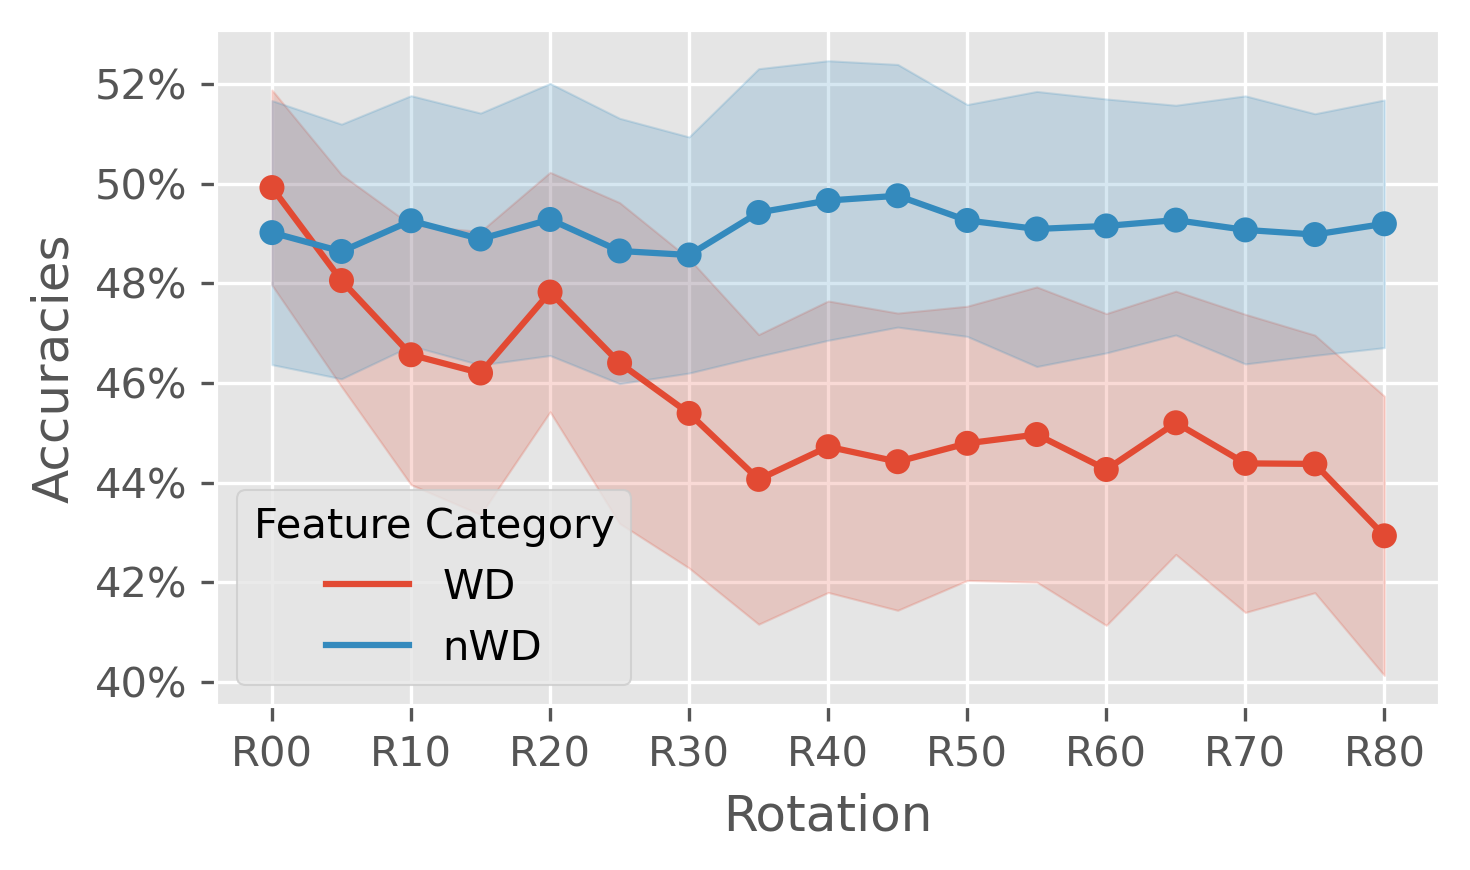

In [6]:
"""Plot graphs"""
# * error bar
errorbar = ('sd', 1)

# Turns off some sklearn warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# Drop All from index
try:
    df_reports_fold_mean.drop("All", level=1, inplace=True)
except:
    # No error is raise if this cell is ran for a second time
    pass

# ! Select the performance metric here (precision of class X = sensitivity class X)
df_plot = df_reports_fold_mean.xs('precision', level=-1)


# * Plot the diagram for primary metric
fig, ax = plt.subplots(1, 1, figsize=(5, 3) ,dpi=300)
sns.lineplot(df_plot[chosen_perf_header_class, chosen_perf_header_name].to_frame().droplevel(0, axis=1).reset_index(), 
             y=chosen_perf_header_name, hue='Feature Category', x='Rotation', 
             ax=ax,  errorbar=errorbar, err_kws = {'alpha':0.2})
# Get the coord for each point
points = df_plot[chosen_perf_header_class, chosen_perf_header_name].to_frame() 
points = points.groupby(['Feature Category', 'Rotation']).mean().droplevel(0, axis=1).reset_index() # Take mean to follow seaborn plot
# Plot the points as a scatter plot
sns.scatterplot(points, x='Rotation', y='accuracy', hue='Feature Category', ax=ax, legend=False, linewidths=0)
ax.set_ylabel("Accuracies")
ax.set_yticklabels([f"{p * 100:.0f}%" for p in ax.get_yticks()])
_xticks = ax.get_xticks()
_xlabels = ax.get_xticklabels()
ax.set_xticks(_xticks[::2])
ax.set_xticklabels(_xlabels[::2])

fig.tight_layout()
fig.savefig("Accuracy.svg", dpi=1200)
plt.plot()



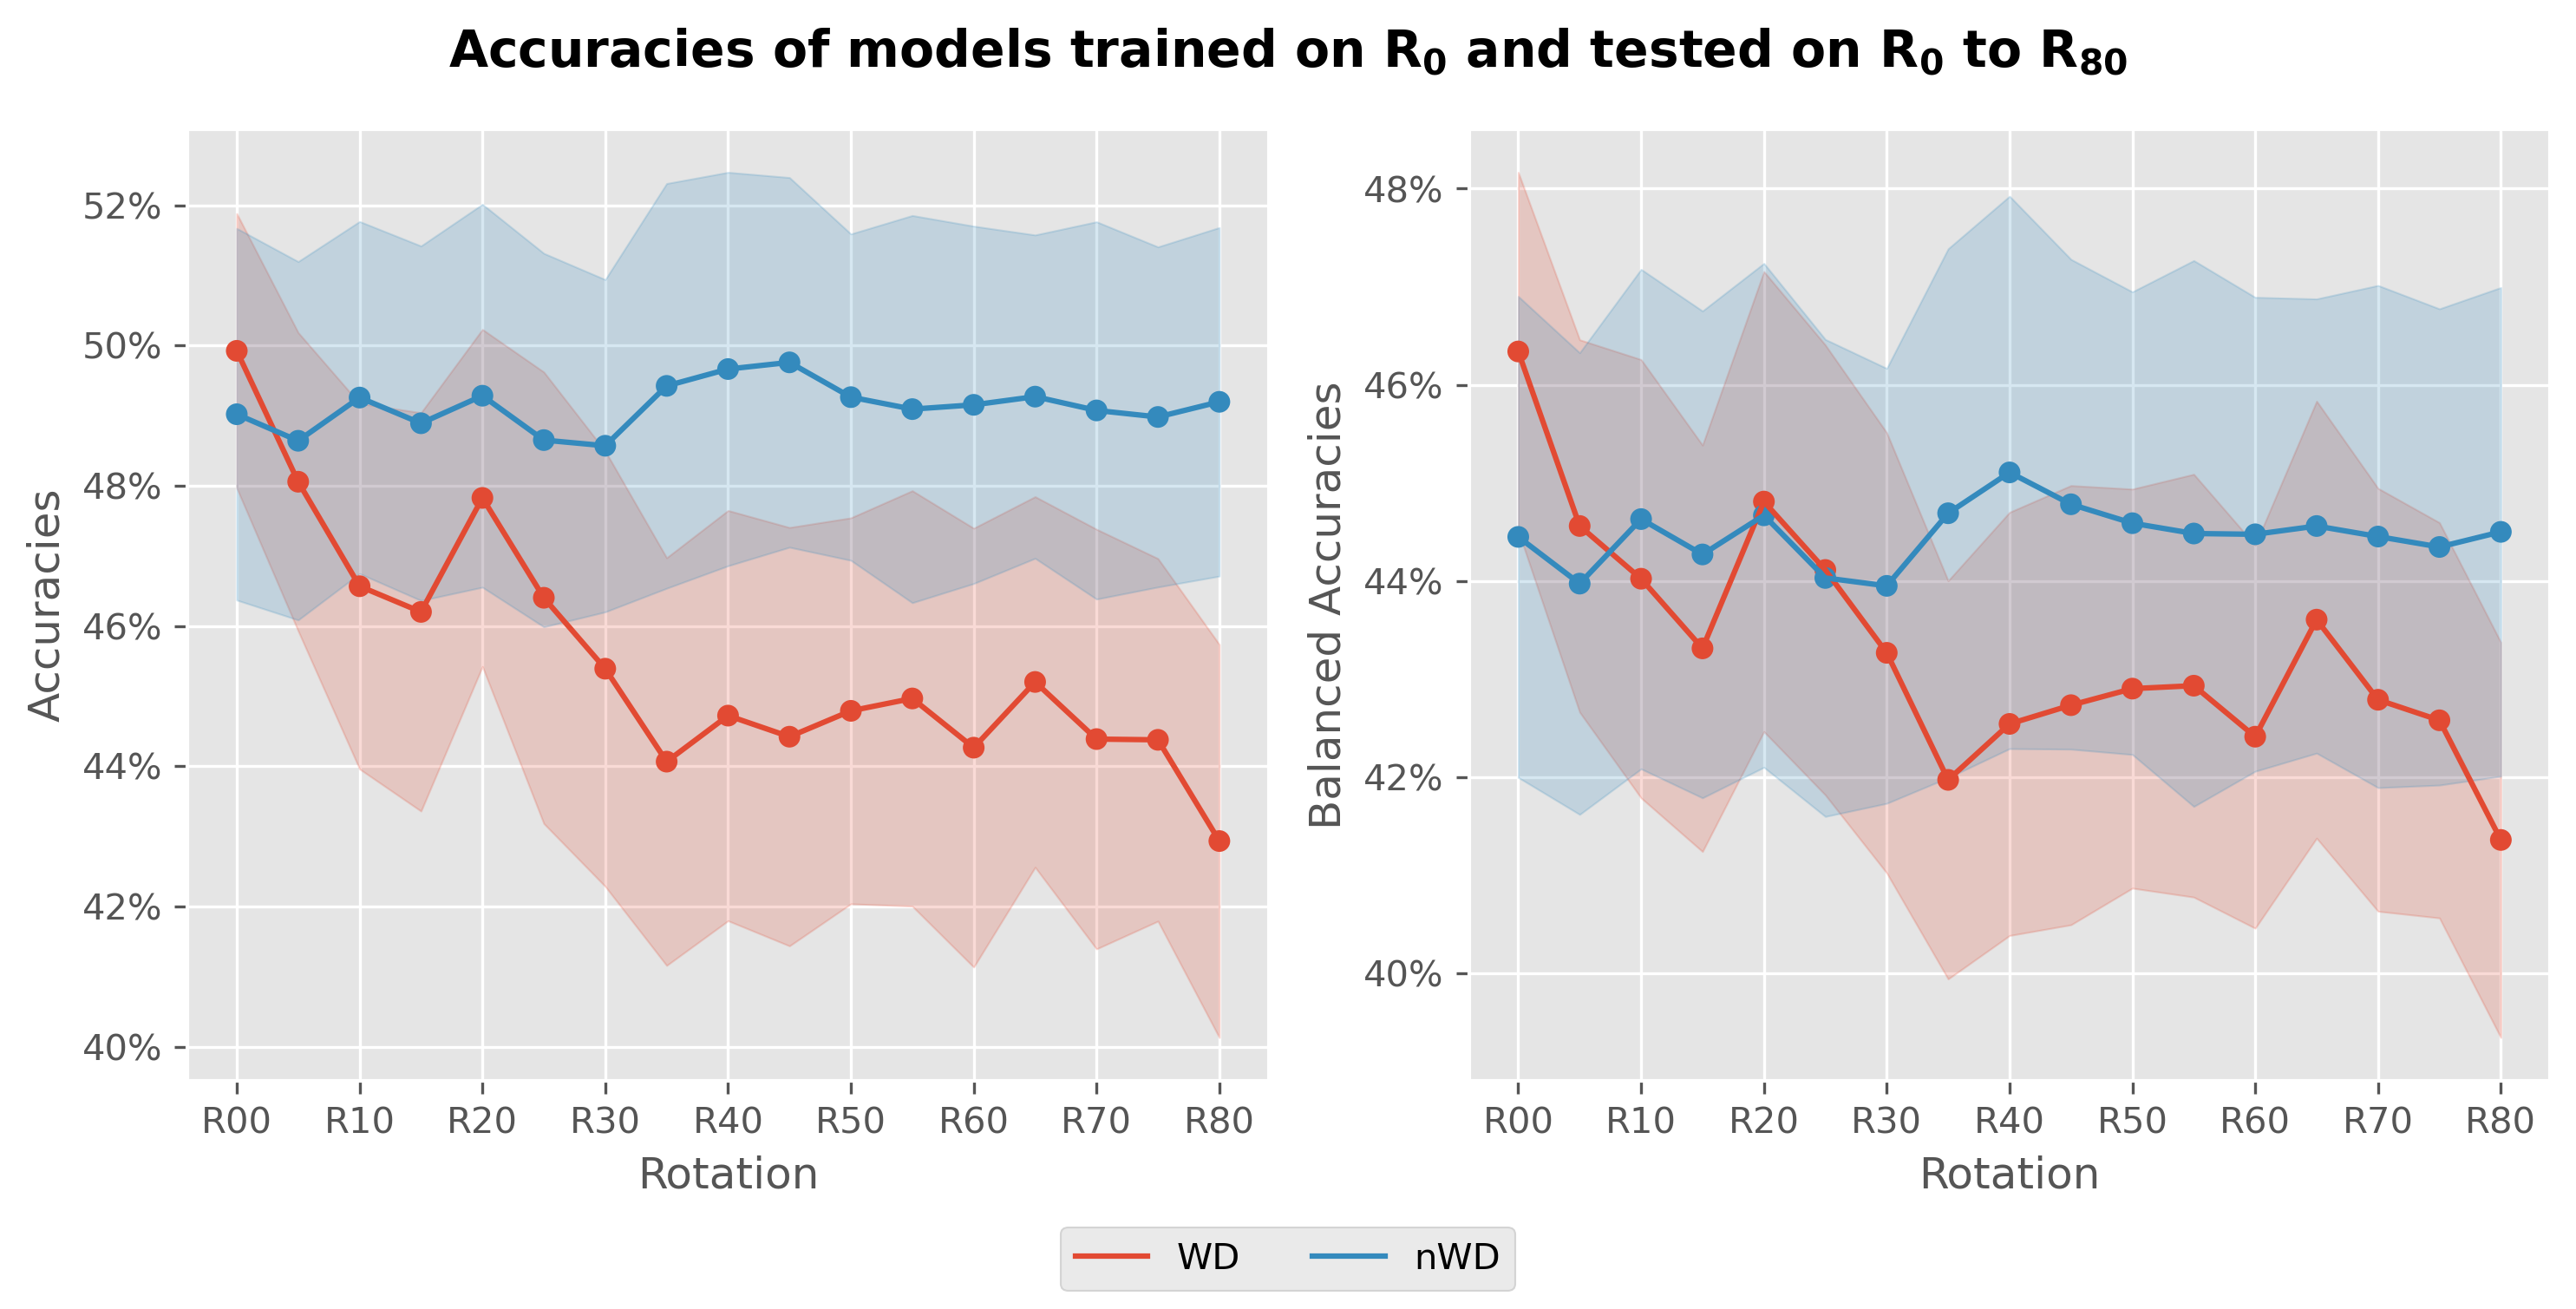

In [7]:


# * Following is for Supplementary 
# * Plot the diagram for primary metric
fig, ax = plt.subplots(1, 2, figsize=(10, 5) ,dpi=300)
sns.lineplot(df_plot[chosen_perf_header_class, chosen_perf_header_name].to_frame().droplevel(0, axis=1).reset_index(), 
             y=chosen_perf_header_name, hue='Feature Category', x='Rotation', 
             ax=ax[0],  errorbar=errorbar, err_kws = {'alpha':0.2})
# Get the coord for each point
points = df_plot[chosen_perf_header_class, chosen_perf_header_name].to_frame() 
points = points.groupby(['Feature Category', 'Rotation']).mean().droplevel(0, axis=1).reset_index() # Take mean to follow seaborn plot
# Plot the points as a scatter plot
sns.scatterplot(points, x='Rotation', y='accuracy', hue='Feature Category', ax=ax[0], legend=False, linewidths=0)


# * Plot the diagram for secondary metric (Balanced ACC)
sns.lineplot(df_plot[('Avg', 'Weighted ACC')].to_frame().droplevel(0, axis=1).reset_index(), 
             y='Weighted ACC', hue='Feature Category', x='Rotation', 
             ax=ax[1],  errorbar=errorbar, err_kws = {'alpha':0.2})
# Get the coord for each point
points = df_plot[('Avg', 'Weighted ACC')].to_frame() 
points = points.groupby(['Feature Category', 'Rotation']).mean().droplevel(0, axis=1).reset_index() # Take mean to follow seaborn plot
# Plot the points as a scatter plot
sns.scatterplot(points, x='Rotation', y='Weighted ACC', hue='Feature Category', ax=ax[1], legend=False, linewidths=0)


# * Unifty the legend
lines, labels = ax[0].get_legend_handles_labels()
ax[0].legend().remove()
ax[1].legend().remove()
fig.legend(lines, labels, loc='lower center', ncols=3)

# * Set the axis
ax[0].set_ylabel("Accuracies")
ax[0].set_yticklabels([f"{p * 100:.0f}%" for p in ax[0].get_yticks()])
ax[1].set_ylabel("Balanced Accuracies")
ax[1].set_yticklabels([f"{p * 100:.0f}%" for p in ax[0].get_yticks()])
# Configure some of the labels to be invisible to prevent plot too crowded
for _ax in ax:
    _xticks = _ax.get_xticks()
    _xlabels = _ax.get_xticklabels()
    
    _ax.set_xticks(_xticks[::2])
    _ax.set_xticklabels(_xlabels[::2])
                
fig.suptitle("Accuracies of models trained on $\\bf{R_0}$ and tested on $\\bf{R_0}$ to $\\bf{R_{80}}$", size=14, weight='bold')
fig.tight_layout(rect=[0, 0.05, 1, 1])

# fig.savefig()
plt.show()

0  \
Trial # Feature Category Model                        Rotation             
0       WD               KNN                          R00       0.409203   
                                                      R05       0.385893   
                                                      R10       0.405019   
                                                      R15       0.400411   
                                                      R20       0.397697   
...                                                                  ...   
49      nWD              Support Vector Machine (rbf) R60       0.152381   
                                                      R65       0.137060   
                                                      R70       0.156870   
                                                      R75       0.148889   
                                                      R80       0.161818   

                                                                       1  \
Trial # Feature Category Model                        Rotation             
0       WD               KNN                          R00       0.550074   
                                                      R05       0.505996   
                                                      R10       0.503698   
                                                      R15       0.481258   
                                                      R20       0.522806   
...                                                                  ...   
49      nWD              Support Vector Machine (rbf) R60       0.468548   
                                                      R65       0.459558   
                                                      R70       0.457389   
                                                      R75       0.471411   
                                                      R80       0.484082   

                                                                       2  \
Trial # Feature Category Model                        Rotation             
0       WD               KNN                          R00       0.166667   
                                                      R05       0.333333   
                                                      R10       0.033333   
                                                      R15       0.050000   
                                                      R20       0.323810   
...                                                                  ...   
49      nWD              Support Vector Machine (rbf) R60       0.075000   
                                                      R65       0.080000   
                                                      R70       0.075000   
                                                      R75       0.066667   
                                                      R80       0.088889   

                                                                accuracy  \
Trial # Feature Category Model                        Rotation             
0       WD               KNN                          R00       0.471531   
                                                      R05       0.436457   
                                                      R10       0.433282   
                                                      R15       0.427035   
                                                      R20       0.446185   
...                                                                  ...   
49      nWD              Support Vector Machine (rbf) R60       0.452330   
                                                      R65       0.442806   
                                                      R70       0.449155   
                                                      R75       0.455504   
                                                      R80       0.461854   

                                                                macro avg  \
Trial # Feature Category Model        

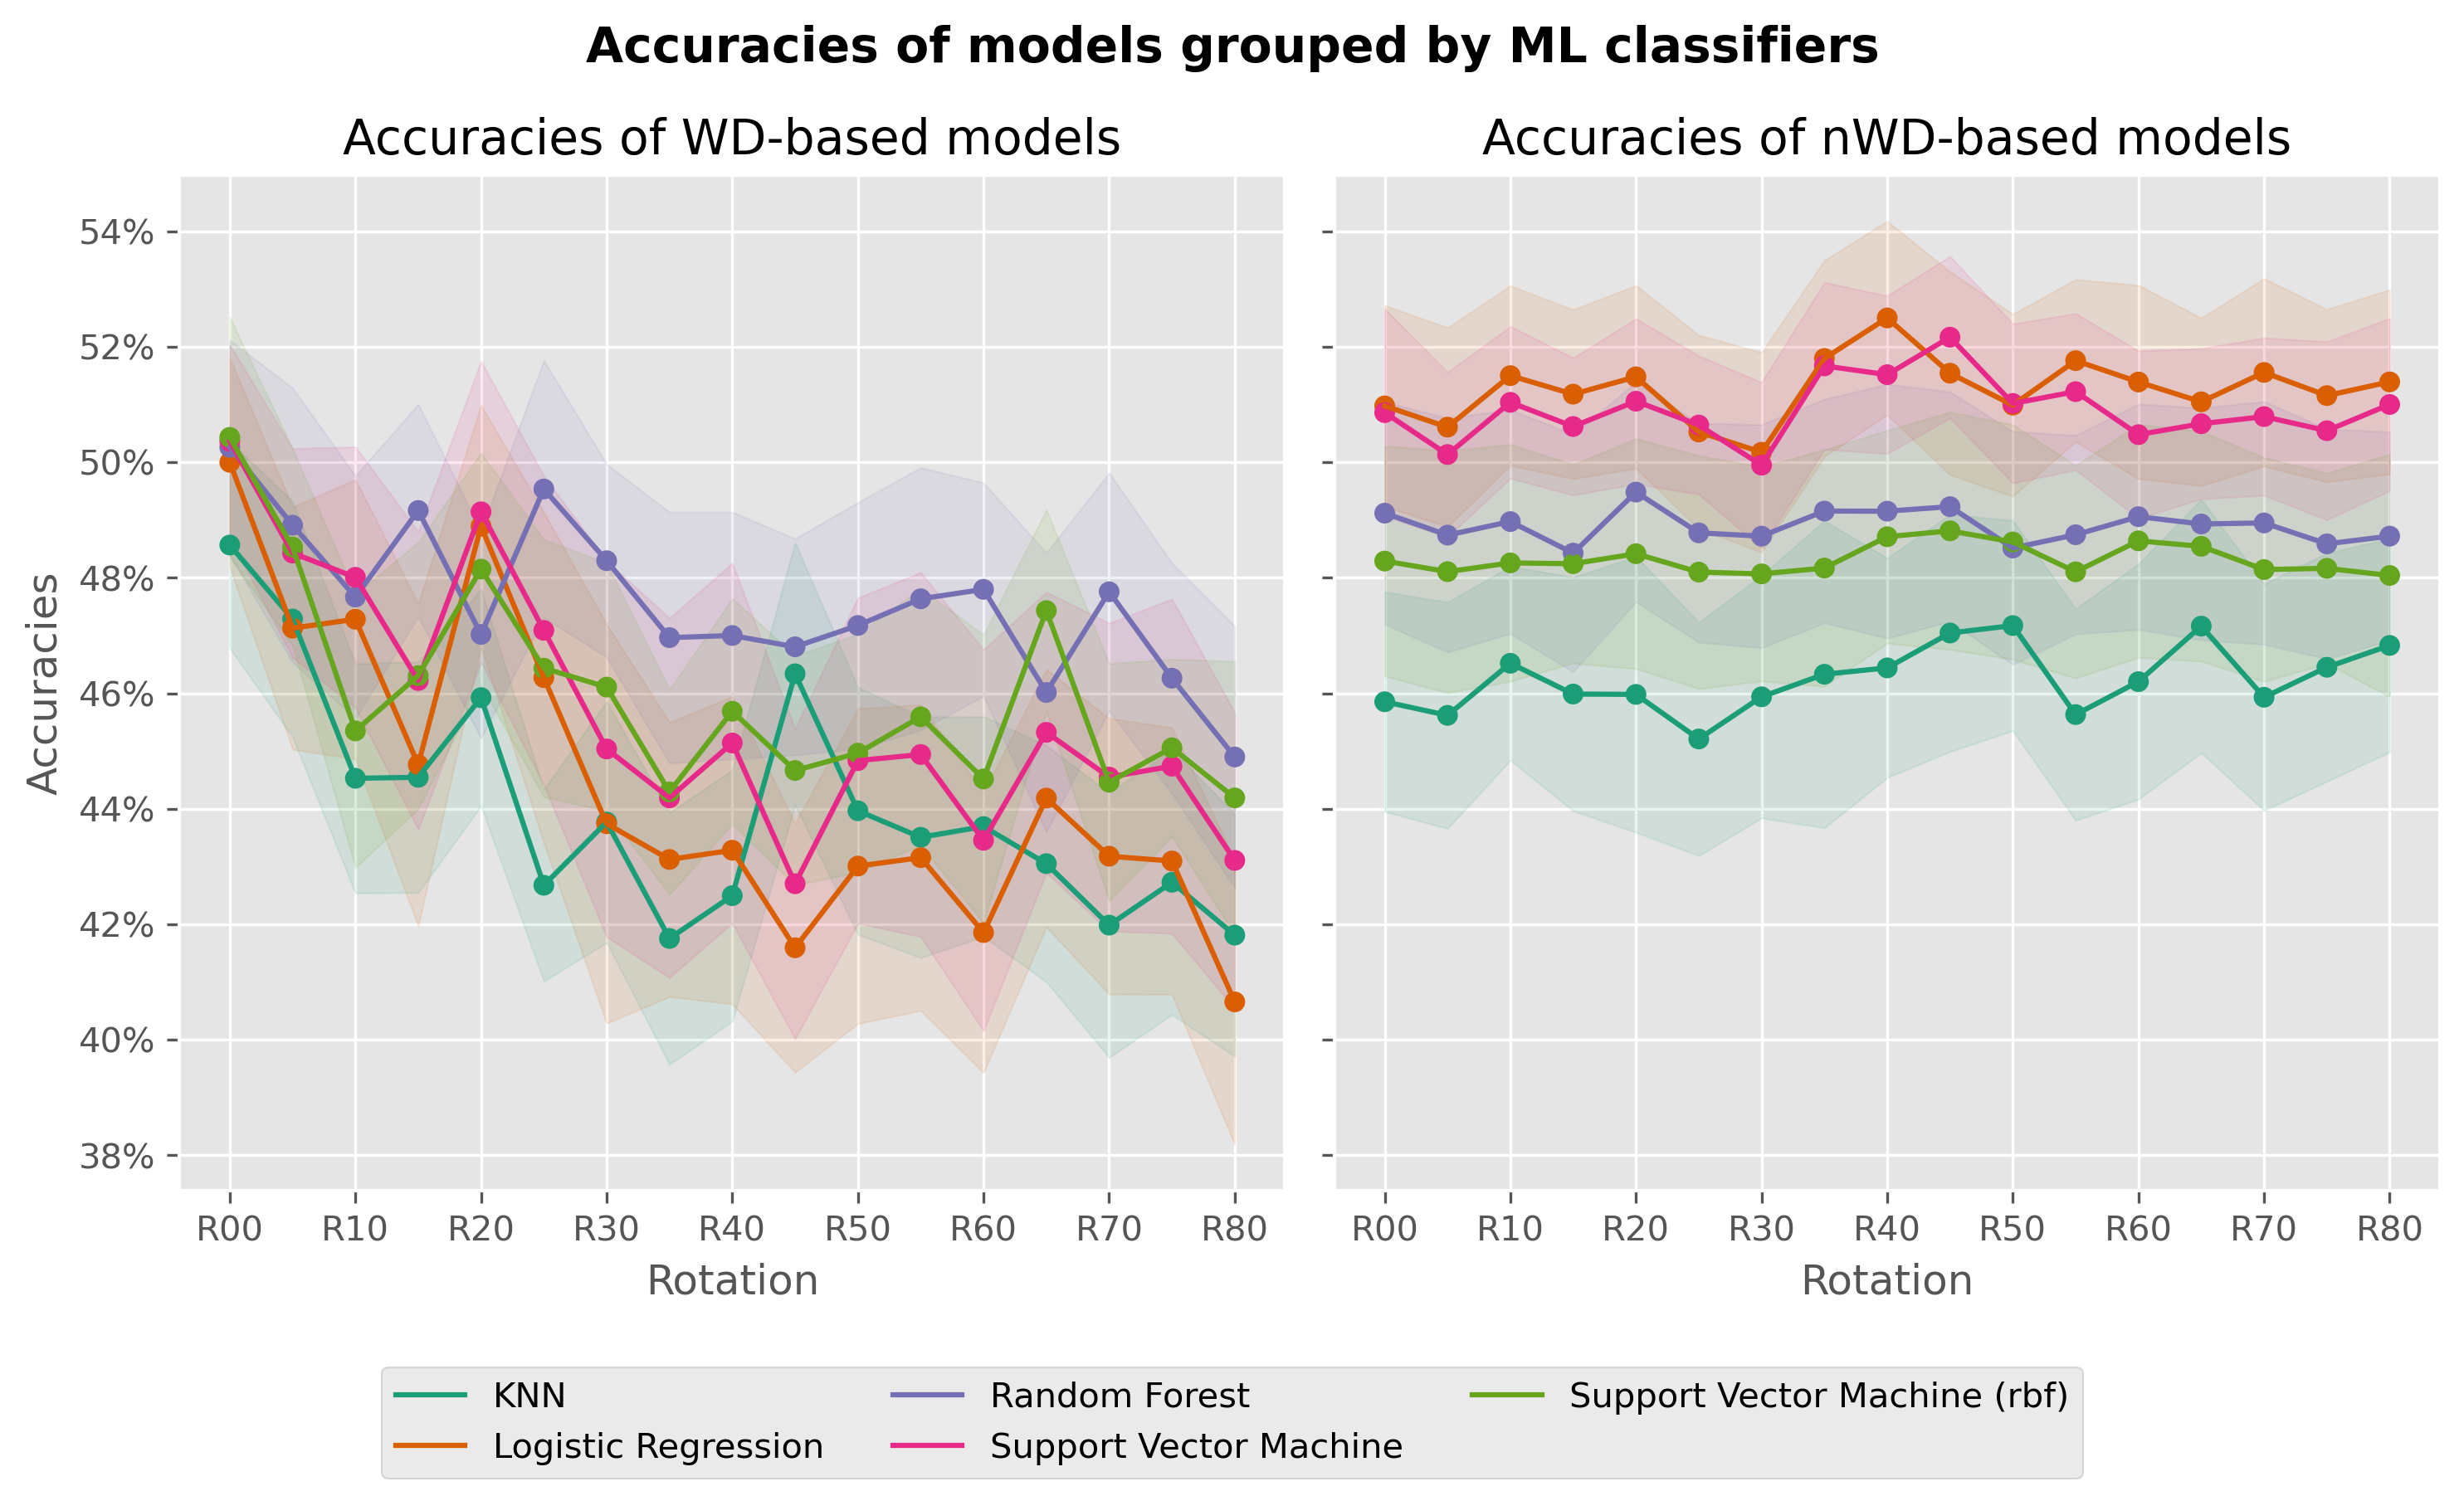

In [8]:
"""Line plot for each models"""
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True, dpi=300)
df_plot2 = df_plot.copy()
df_plot2 = df_plot2.droplevel(0, axis=1)
display(df_plot2)

df_plot2_wd = df_plot2.xs('WD', level='Feature Category')
df_plot2_nwd = df_plot2.xs('nWD', level='Feature Category')

# * Plot for WD features
sns.lineplot(df_plot2_wd.reset_index(), y=chosen_perf_header_name, hue='Model',
             x='Rotation', ax=ax[0], palette='Dark2', errorbar=errorbar, err_kws = {'alpha':0.1})
# Get the coord for each point
points = df_plot2_wd[chosen_perf_header_name].to_frame() 
points = points.groupby(['Rotation', 'Model']).mean().reset_index() # Take mean to follow seaborn plot
# Plot the points as a scatter plot
sns.scatterplot(points, x='Rotation', y=chosen_perf_header_name, hue='Model', ax=ax[0], legend=False, linewidths=0, palette='Dark2')


# * Plot for nWD features
sns.lineplot(df_plot2_nwd.reset_index(), y=chosen_perf_header_name, hue='Model',
             x='Rotation', ax=ax[1], palette='Dark2', errorbar=errorbar, err_kws = {'alpha':0.1})
# Get the coord for each point
points = df_plot2_nwd[chosen_perf_header_name].to_frame() 
points = points.groupby(['Rotation', 'Model']).mean().reset_index() # Take mean to follow seaborn plot
# Plot the points as a scatter plot
sns.scatterplot(points, x='Rotation', y=chosen_perf_header_name, hue='Model', ax=ax[1], legend=False, linewidths=0, palette='Dark2')

# * Set figure styles
fig.suptitle("Accuracies of models grouped by ML classifiers", size=14, weight='bold')
ax[0].set_title("Accuracies of WD-based models", size=14)
ax[1].set_title("Accuracies of nWD-based models", size=14)

# Set presentation to percentages
ax[0].set_ylabel("Accuracies")
ax[0].set_yticklabels([f"{p * 100:.0f}%" for p in ax[0].get_yticks()])

# Plot a unified legend for both plots
lines, labels = ax[0].get_legend_handles_labels()
ax[0].legend().remove()
ax[1].legend().remove()
# Configure some of the labels to be invisible to prevent plot too crowded
for _ax in ax:
    _xticks = _ax.get_xticks()
    _xlabels = _ax.get_xticklabels()
    
    _ax.set_xticks(_xticks[::2])
    _ax.set_xticklabels(_xlabels[::2])

# show plots
fig.tight_layout(rect=[0, 0.1, 1, 1])
fig.legend(lines, labels, loc='lower center', ncols=3)
plt.show()

## Boxplot

[]

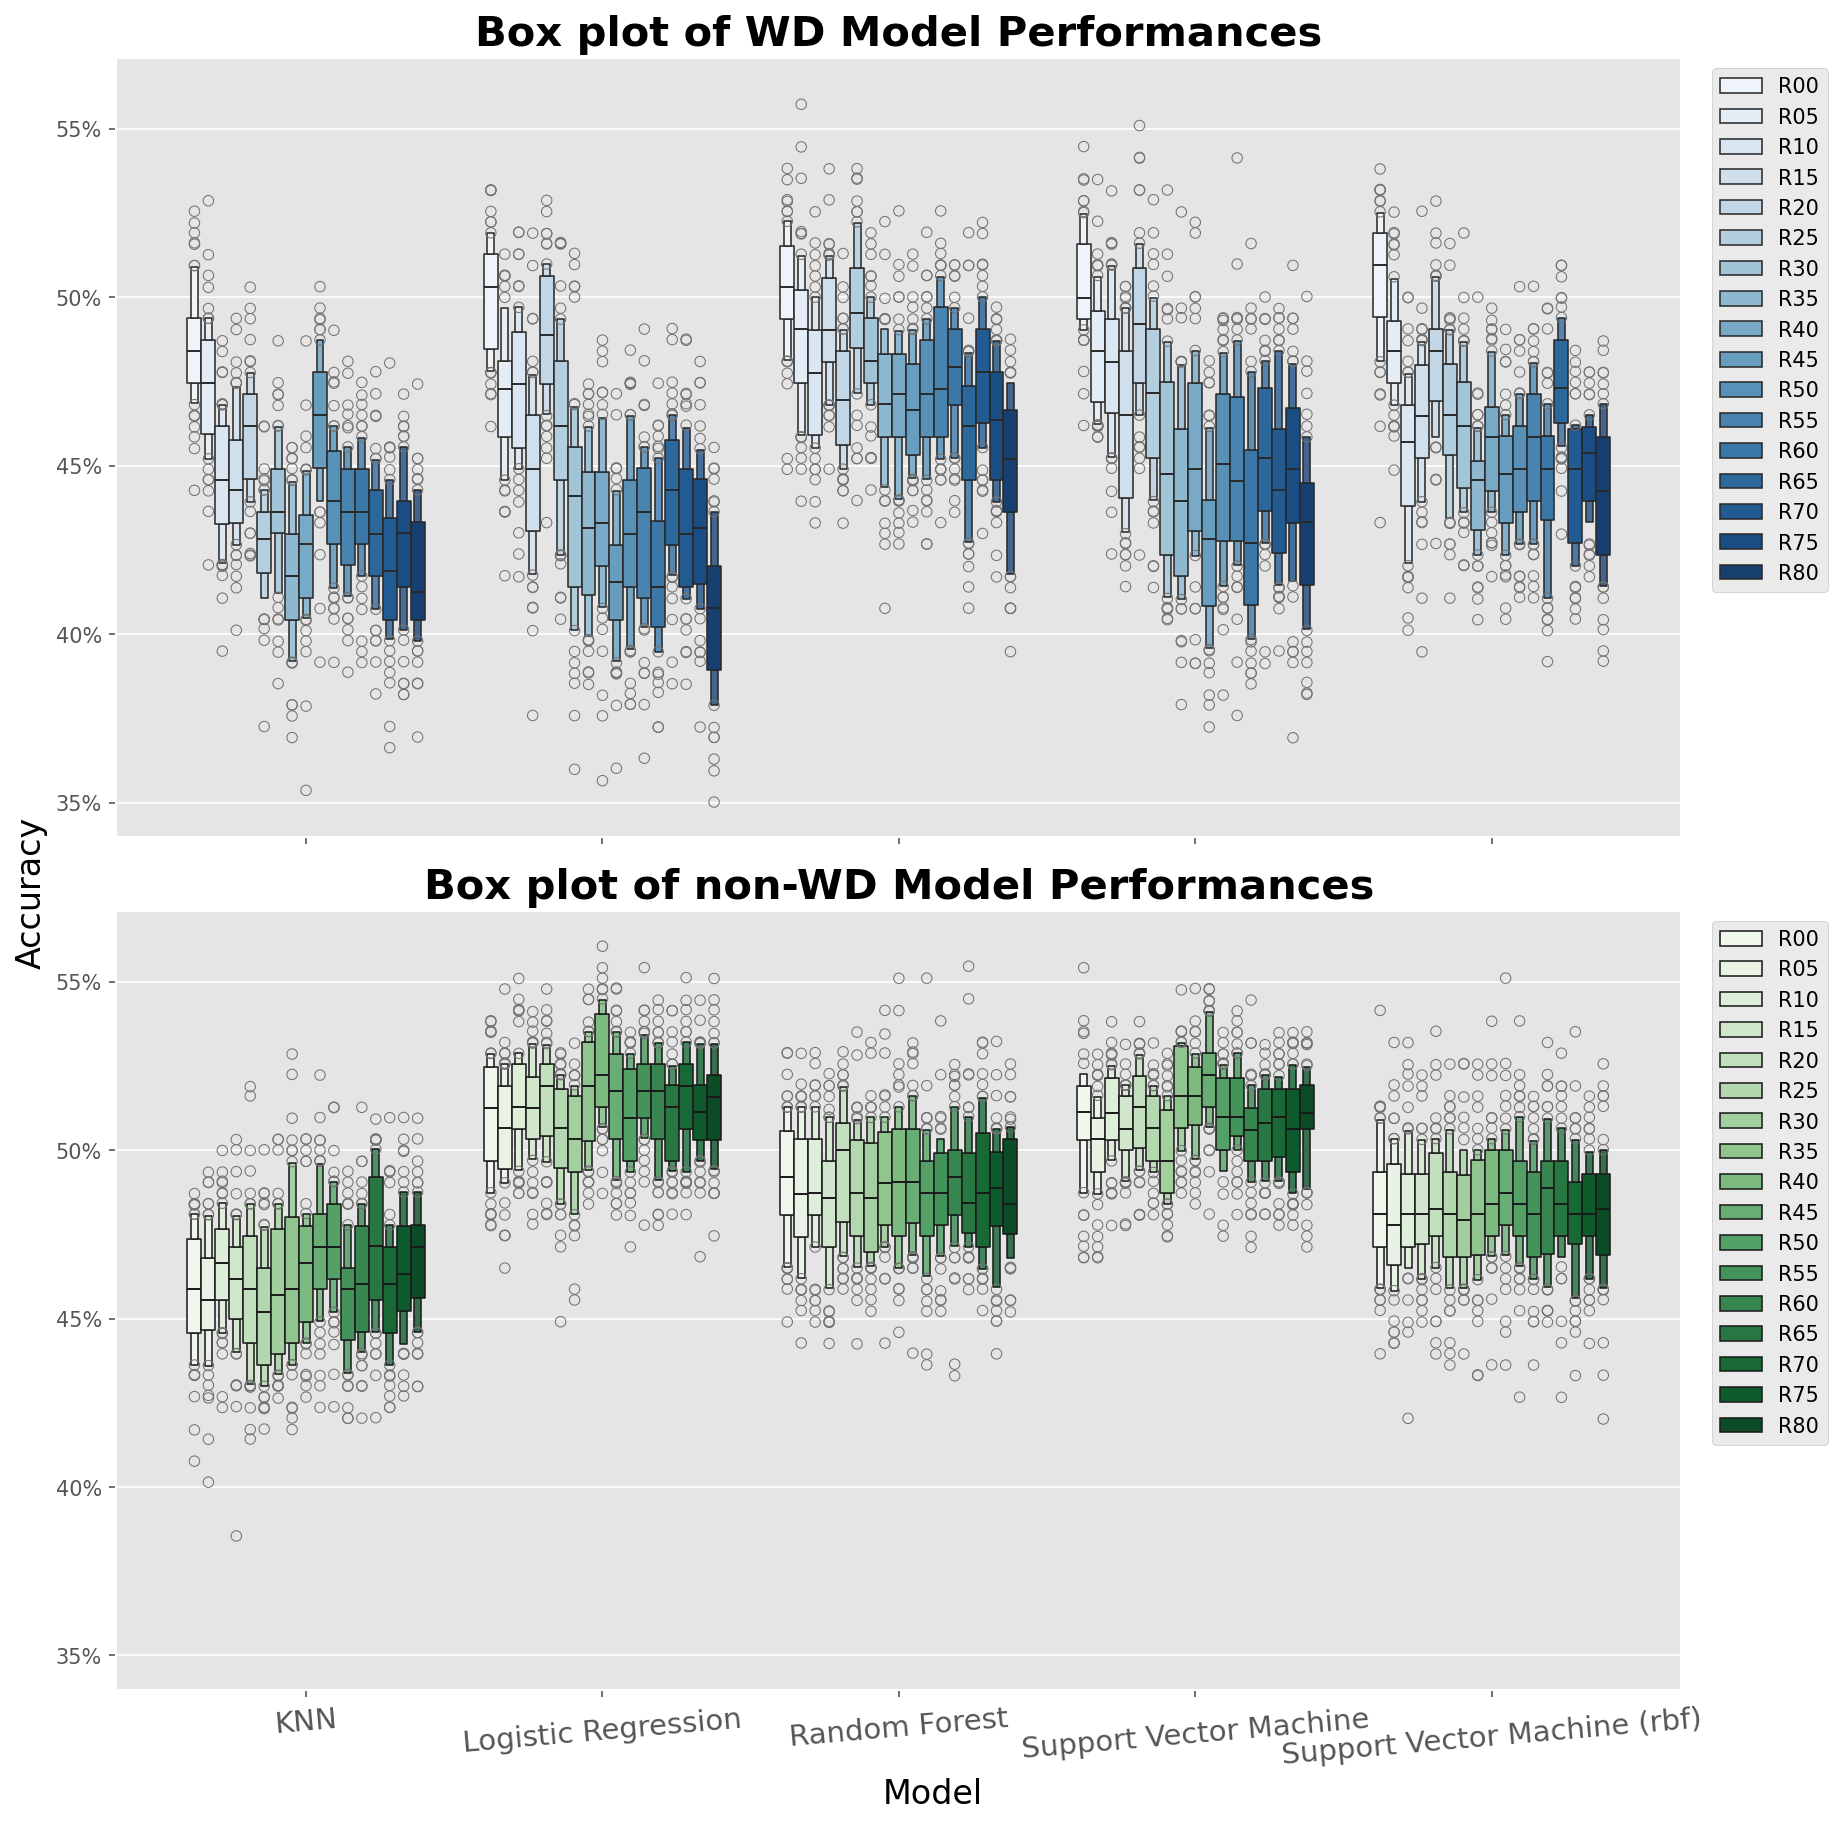

In [9]:
"""Plot a en box plot to visualize the distribution of performance"""

fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharey=True, sharex=True, dpi=150)

sns.boxenplot(df_plot2_wd, x = 'Model', y = chosen_perf_header_name, hue='Rotation', ax = ax[0], palette='Blues')
sns.boxenplot(df_plot2_nwd, x = 'Model', y = chosen_perf_header_name, hue='Rotation', ax = ax[1], palette='Greens')

# * Set plot styles
ax[0].set_ylabel(None)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[0].set_yticklabels([f"{p * 100:.0f}%" for p in ax[0].get_yticks()])
ax[1].set_yticklabels([f"{p * 100:.0f}%" for p in ax[1].get_yticks()])
ax[0].set_title("Box plot of WD Model Performances", size=20, fontweight='bold')
ax[1].set_title("Box plot of non-WD Model Performances", size=20, fontweight='bold')
ax[0].legend(bbox_to_anchor=(1.1, 1),ncols=1)
ax[1].legend(bbox_to_anchor=(1.1, 1),ncols=1)
ax[1].set_xticklabels(ax[1].get_xticklabels(), size=14)
fig.autofmt_xdate(rotation=5, ha='center')
fig.tight_layout()
fig.supylabel("Accuracy", x=-.01, size=16)
fig.supxlabel("Model", y=-.01, size=16)
plt.plot()


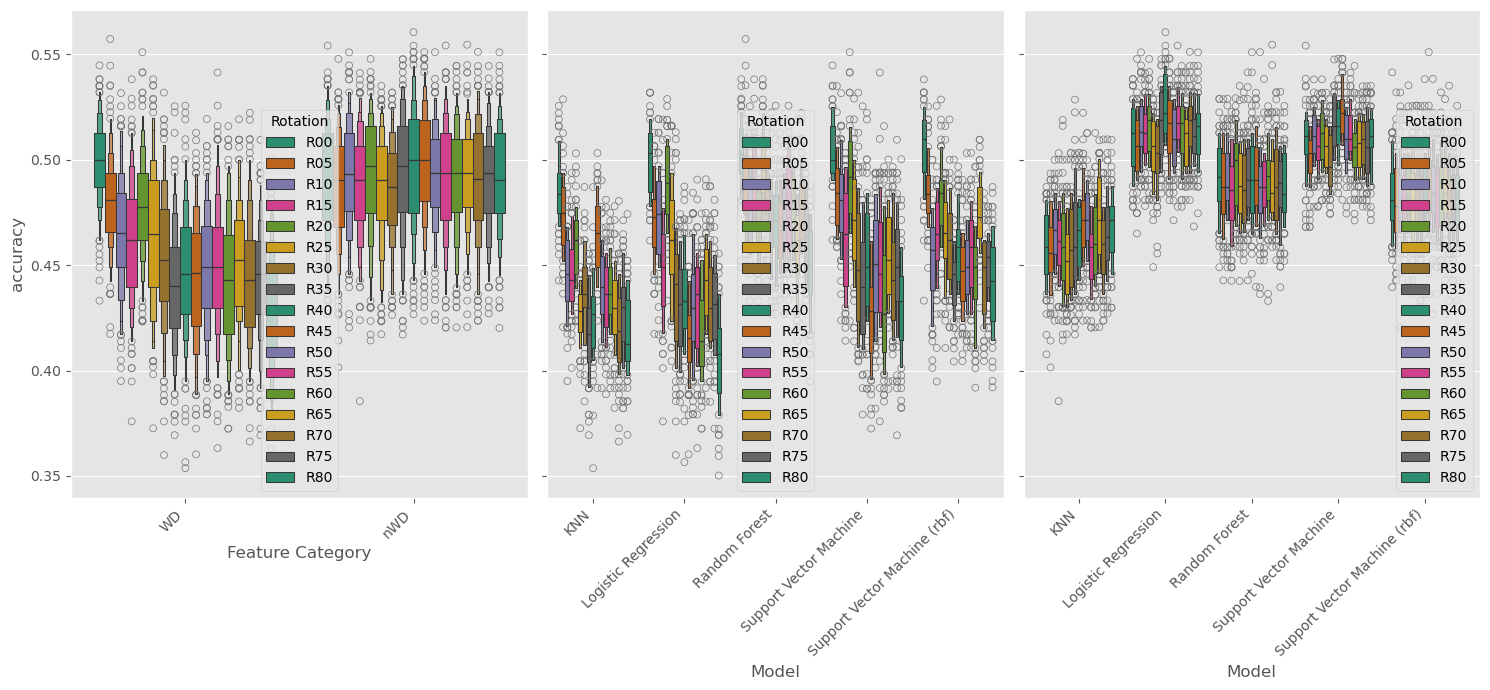

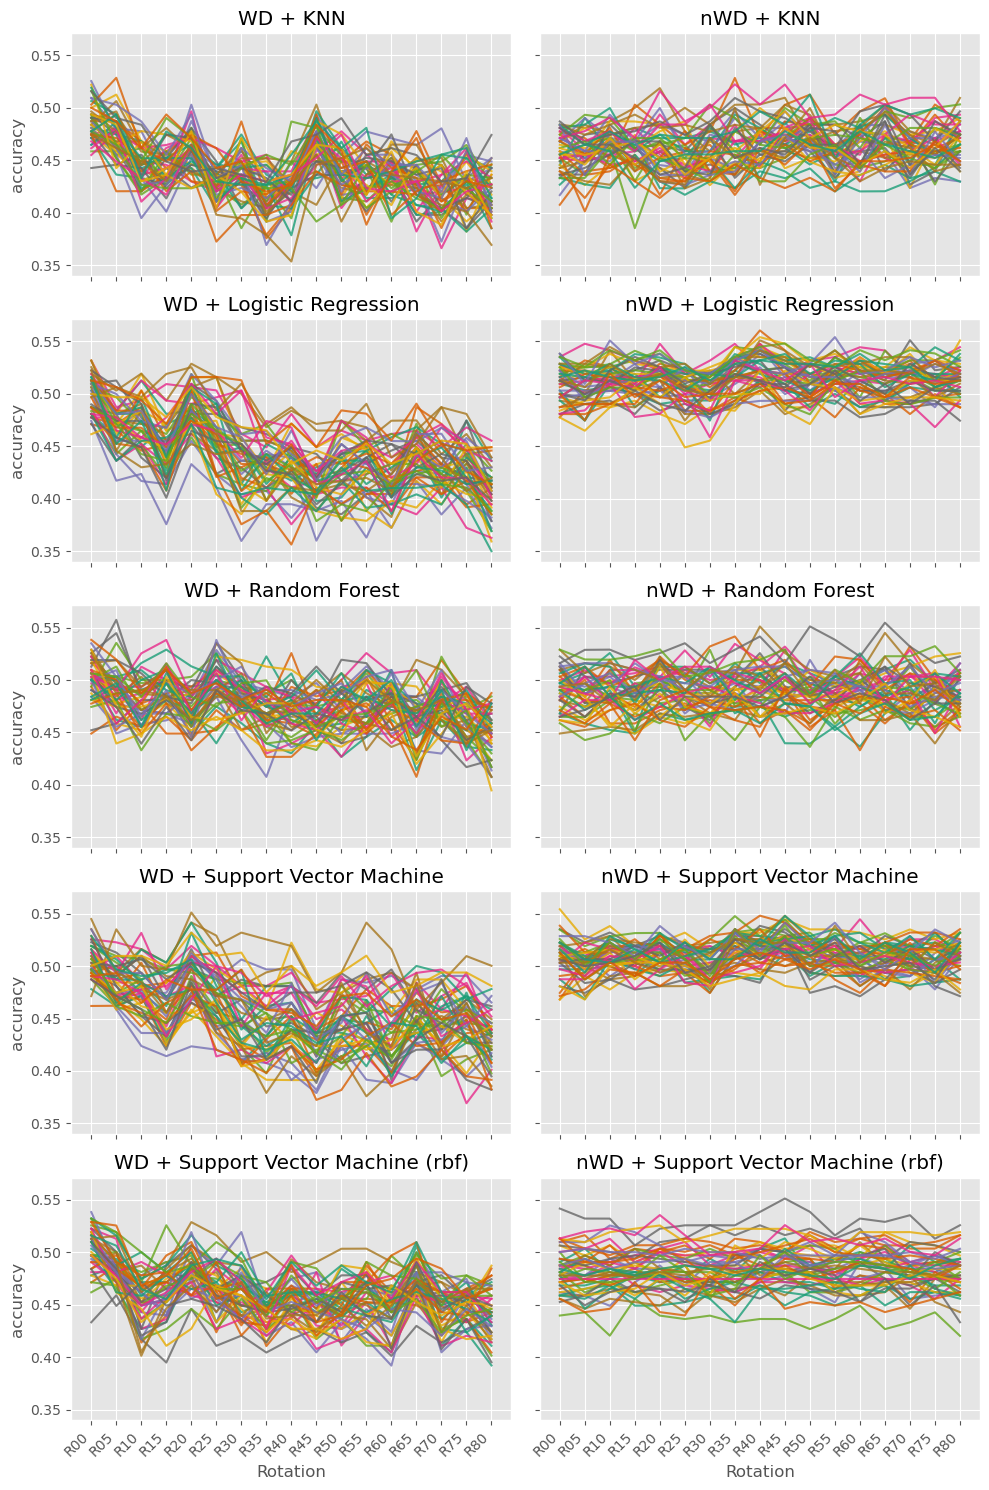

In [10]:
df_trials_perf_melt_wd = df_plot2_wd
df_trials_perf_melt_nwd = df_plot2_nwd
fig, ax = plt.subplots(1, 3, figsize=(15, 7), sharey=True)
sns.boxenplot(df_plot.droplevel(0, axis=1), y=chosen_perf_header_name, hue='Rotation',
             x='Feature Category', ax=ax[0], palette='Dark2')
sns.boxenplot(df_trials_perf_melt_wd, y=chosen_perf_header_name, hue='Rotation',
             x='Model', ax=ax[1], palette='Dark2')
sns.boxenplot(df_trials_perf_melt_nwd, y=chosen_perf_header_name, hue='Rotation',
             x='Model', ax=ax[2], palette='Dark2')
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.plot()

fig, ax = plt.subplots(len(df_plot.index.get_level_values('Model').unique()), 2, figsize=(10, 15), sharey=True)
for i, fc in enumerate(['WD', 'nWD']):
    for j, md in enumerate(df_plot.index.get_level_values('Model').unique()):
        _ax = ax[j][i]
        _ax.set_title(f"{fc} + {md}")
        sns.lineplot(df_plot.xs(fc, level='Feature Category').xs(md, level='Model').droplevel(0, axis=1), y=chosen_perf_header_name, hue='Trial #',
                     x='Rotation', ax=_ax, palette='Dark2', alpha=0.8) 
        _ax.get_legend().remove()
# sns.lineplot(, y=chosen_perf_header_name, hue='Trial #',
#              x='Rotation', ax=ax, palette='Dark2')
# ax.get_legend().remove()
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()

### Tables

This cell generates the tables for both manintax and supplementary analysis

In [11]:
# Print summary of performance
display(df_trials_fold_means)
perf_summary = pd.concat([df_trials_fold_means.groupby(level=['Feature Category', 'Model', 'Rotation']).mean(), df_trials_fold_means.groupby(level=['Feature Category', 'Model', 'Rotation']).std()], axis=1)
perf_summary.columns=['Accuracy', 'Std']
perf_summary['Result'] = [f"{a*100:.1f}% ± {b*100:.1f}%" for idx, (a, b) in perf_summary.iterrows()]
mdprint("#### Performance grouped by models")
display(HTML(perf_summary['Result'].reset_index().set_index(['Feature Category', 'Model'], drop=True).pivot(columns=['Rotation']).T.to_html()))

perf_summary = df_trials_fold_means.groupby(level=['Feature Category', 'Rotation']).mean()

perf_summary_sd = df_trials_fold_means.groupby(level=['Feature Category', 'Rotation']).std()
perf_summary_sd.columns = ['Std']
perf_summary_counts = df_trials_fold_means.groupby(level=['Feature Category', 'Rotation']).count()
perf_summary_counts.columns = ['Counts']
perf_summary['Result'] = [f"{a*100:.1f}% ± {b*100:.1f}%" for a, b in zip(perf_summary['accuracy'].to_list(), perf_summary_sd['Std'].to_list())]
mdprint("#### Performance")
display(HTML(perf_summary['Result'].to_frame().join(perf_summary_counts).to_html()))

display(df_trials_fold_means.groupby(level=['Feature Category', 'Rotation']).describe())


accuracy
Trial #   Feature Category Model                        Rotation          
Trial-000 WD               KNN                          R00       0.471531
                                                        R05       0.436457
                                                        R10       0.433282
                                                        R15       0.427035
                                                        R20       0.446185
...                                                                    ...
Trial-049 nWD              Support Vector Machine (rbf) R60       0.452330
                                                        R65       0.442806
                                                        R70       0.449155
                                                        R75       0.455504
                                                        R80       0.461854

[8500 rows x 1 columns]

#### Performance grouped by models

#### Performance

accuracy                                          \
                             count      mean       std       min       25%   
Feature Category Rotation                                                    
WD               R00         250.0  0.499244  0.019584  0.433129  0.487122   
                 R05         250.0  0.480574  0.021275  0.417358  0.465899   
                 R10         250.0  0.465672  0.026071  0.394982  0.449066   
                 R15         250.0  0.462008  0.028412  0.375883  0.439529   
                 R20         250.0  0.478265  0.024042  0.423246  0.461751   
                 R25         250.0  0.464024  0.032201  0.372606  0.439606   
                 R30         250.0  0.453906  0.031047  0.359908  0.433129   
                 R35         250.0  0.440652  0.029074  0.369329  0.420200   
                 R40         250.0  0.447216  0.029259  0.353661  0.426997   
                 R45         250.0  0.444208  0.029839  0.360215  0.421249   
                 R50         250.0  0.447897  0.027527  0.379160  0.429608   
                 R55         250.0  0.449663  0.029628  0.363185  0.429506   
                 R60         250.0  0.442644  0.031297  0.372401  0.417320   
                 R65         250.0  0.452018  0.026427  0.382284  0.430837   
                 R70         250.0  0.443869  0.029929  0.366308  0.420494   
                 R75         250.0  0.443763  0.025858  0.369278  0.426882   
                 R80         250.0  0.429327  0.028033  0.350179  0.408628   
nWD              R00         250.0  0.490201  0.026509  0.407680  0.471377   
                 R05         250.0  0.486415  0.025560  0.401434  0.468088   
                 R10         250.0  0.492579  0.025114  0.420379  0.475525   
                 R15         250.0  0.488917  0.025284  0.385458  0.471275   
                 R20         250.0  0.492840  0.027312  0.414235  0.474552   
                 R25         250.0  0.486513  0.026637  0.417204  0.471275   
                 R30         250.0  0.485706  0.023701  0.426370  0.469265   
                 R35         250.0  0.494244  0.028866  0.417051  0.475410   
                 R40         250.0  0.496645  0.028064  0.426677  0.474552   
                 R45         250.0  0.497597  0.026366  0.423605  0.480594   
                 R50         250.0  0.492638  0.023277  0.423810  0.477535   
                 R55         250.0  0.490931  0.027616  0.420379  0.471262   
                 R60         250.0  0.491541  0.025489  0.420430  0.475371   
                 R65         250.0  0.492711  0.023059  0.420584  0.477624   
                 R70         250.0  0.490744  0.026911  0.423605  0.471288   
                 R75         250.0  0.489811  0.024257  0.427035  0.474552   
                 R80         250.0  0.491971  0.024862  0.420174  0.474552   

                                                         
                                50%       75%       max  
Feature Category Rotation                                
WD               R00       0.500051  0.512890  0.544752  
                 R05       0.480748  0.493638  0.557296  
                 R10       0.465131  0.484114  0.531592  
                 R15       0.461726  0.481157  0.538146  
                 R20       0.477675  0.493740  0.550998  
                 R25       0.464747  0.490361  0.538198  
                 R30       0.452253  0.476856  0.531848  
                 R35       0.439862  0.458756  0.525346  
                 R40       0.445801  0.468049  0.525653  
                 R45       0.446083  0.465169  0.512801  
                 R50       0.448950  0.468344  0.519304  
                 R55       0.449053  0.468203  0.541372  
                 R60       0.442729  0.464132  0.515975  
                 R65       0.452330  0.471211  0.519201  
                 R70       0.442806  0.462058  0.522222  
                 R75       0.445750  0.461674  0.509473  
                 R80       0.430031  

# Statistical test with python

## Paired T-test 

Paired-sample t-test was used to compare the 5-fold cross-validation performance of WD and non-WD models. Paired-sample t-test was ued because the cross-validation fold divisions were identical for training WD and nWD radiomics models.

In [12]:
from scipy.stats import ttest_rel, ttest_ind

# * perform test for accuracy
wd_perf = df_plot2_wd['accuracy']
nwd_perf = df_plot2_nwd.loc[wd_perf.index]['accuracy']

rows = []
for model in list(wd_perf.index.get_level_values("Model").unique()) + [None]:
    if model is None:
        _wd_perf = wd_perf
        _nwd_perf = nwd_perf
        model = "Combined"
    else:
        _wd_perf = wd_perf.xs(model, level='Model')
        _nwd_perf = nwd_perf.xs(model, level='Model')
    
    t_stat, p_value = ttest_rel(_wd_perf.values, _nwd_perf.values)
    row = pd.Series({
        'Mean WD': _wd_perf.mean(), 
        'Mean nWD': _nwd_perf.mean(), 
        'T-statistics': t_stat, 
        'pval': p_value
    }, name=model)
    rows.append(row)


ttest_res = pd.concat(rows, axis=1).T
display(ttest_res)

Mean WD  Mean nWD  T-statistics           pval
KNN                           0.440373  0.462534    -18.035497   8.282613e-62
Logistic Regression           0.444250  0.512691    -48.857672  6.635109e-249
Random Forest                 0.475982  0.488999    -12.815083   1.693582e-34
Support Vector Machine        0.457220  0.509051    -39.420054  5.341029e-194
Support Vector Machine (rbf)  0.460102  0.483196    -19.529184   1.944746e-70
Combined                      0.455585  0.491294    -55.905125   0.000000e+00

### Group by rotation

In [13]:
rows = []
for idx, _perf in df_reports_predict[('Class','accuracy')].groupby('Rotation'):
    _wd_perf = _perf.xs('WD', level='Feature Category')
    _nwd_perf = _perf.xs('nWD', level='Feature Category')
    t_stat, p_value = ttest_ind(_wd_perf.values, _nwd_perf.values)
    row = pd.Series({
        'Mean WD': _wd_perf.mean(), 
        'Mean nWD': _nwd_perf.mean(), 
        'T-statistics': t_stat, 
        'pval': p_value
    }, name=idx)
    rows.append(row)
rot_ttest_res = pd.concat(rows, axis=1).T
display(rot_ttest_res)

Mean WD  Mean nWD  T-statistics           pval
R00  0.499244  0.490201      8.414676   4.479076e-17
R05  0.480574  0.486415     -5.302747   1.165078e-07
R10  0.465672  0.492579    -23.629666  3.610511e-120
R15  0.462008  0.488917    -23.365996  1.294476e-117
R20  0.478265  0.492840    -12.983957   3.072254e-38
R25  0.464024  0.486513    -18.284492   1.721284e-73
R30  0.453906  0.485706    -26.300795  1.805230e-147
R35  0.440652  0.494244    -44.502922   0.000000e+00
R40  0.447216  0.496645    -42.224208   0.000000e+00
R45  0.444208  0.497597    -44.410669   0.000000e+00
R50  0.447897  0.492638    -37.603325  1.470627e-289
R55  0.449663  0.490931    -32.982557  1.483850e-226
R60  0.442644  0.491541    -39.070611   0.000000e+00
R65  0.452018  0.492711    -34.914678  4.063068e-252
R70  0.443869  0.490744    -37.686120  9.574220e-291
R75  0.443763  0.489811    -39.432143   0.000000e+00
R80  0.429327  0.491971    -50.930001   0.000000e+00

## Best trial performance

In [14]:
"""For each configuration list out the best performance"""
print(f"{wd_perf.max() * 100 = :.2f}%")
print(f"{nwd_perf.max() * 100 = :.2f}%")

rows = []
for model in list(wd_perf.index.get_level_values("Model").unique()) + [None]:
    if model is None:
        _wd_perf = wd_perf
        _nwd_perf = nwd_perf
        model = "Combined"
    else:
        _wd_perf = wd_perf.xs(model, level='Model')
        _nwd_perf = nwd_perf.xs(model, level='Model')

    row = pd.Series({
        'WD_max': _wd_perf.max(), 
        'WD_min': _wd_perf.min(), 
        'WD_mean': _wd_perf.mean(), 
        'WD_std': _wd_perf.std(),
        'nWD_max': _nwd_perf.max(),
        'nWD_min': _nwd_perf.min(), 
        'nWD_mean': _nwd_perf.mean(), 
        'nWD_std': _nwd_perf.std(),
    }, name=model)
    rows.append(row)

df_acc_max = pd.concat(rows, axis=1).T.map(lambda x: f"{x * 100: .2f}%")
mdprint("### Best and worst performance (across all trials)")
display(df_acc_max)

wd_perf.max() * 100 = 55.73%
nwd_perf.max() * 100 = 56.05%


### Best and worst performance (across all trials)

WD_max   WD_min  WD_mean  WD_std  nWD_max  \
KNN                            52.87%   35.37%   44.04%   2.80%   52.85%   
Logistic Regression            53.19%   35.02%   44.42%   3.54%   56.05%   
Random Forest                  55.73%   39.48%   47.60%   2.43%   55.46%   
Support Vector Machine         55.10%   36.93%   45.72%   3.43%   55.41%   
Support Vector Machine (rbf)   53.81%   39.19%   46.01%   2.66%   55.10%   
Combined                       55.73%   35.02%   45.56%   3.26%   56.05%   

                              nWD_min nWD_mean nWD_std  
KNN                            38.55%   46.25%   2.09%  
Logistic Regression            44.91%   51.27%   1.69%  
Random Forest                  43.30%   48.90%   1.97%  
Support Vector Machine         46.80%   50.91%   1.50%  
Support Vector Machine (rbf)   42.02%   48.32%   1.96%  
Combined                       38.55%   49.13%   2.60%

# Save results for SPSS Statistical analysis

> [!warn] Please make sure you are not opening the file to be saved in SPSS before running the following cell. Otherwise, the python kernel most definitely will crash.

In [15]:
import pyreadstat
import pandas as pd

#! This is a checkpoint mechanism in case SPSS dies midway
# Save the dataframe first to recover from crash quickly
temp_hdf = data_dir / "_temp_storage.h5"
df_trials.to_hdf(temp_hdf, key="pre_calculate_predict")
df_reports_predict.to_hdf(temp_hdf, key="predict")

# # Read back the dataframe
# df_reports_predict = pd.read_hdf(temp_hdf, key="pre_calculate_predict")
# df_recalculated_perf = pd.read_hdf(temp_hdf, key="predict")

var_measure = {
    'Fold_Number': 'nominal', 
    'Feature_Category': 'nominal', 
    'Model': 'nominal', 
    'Rotation': 'scale', 
    'Rotation_cat': 'ordinal',
    chosen_perf_header_name: 'scale'
    
}
# pyreadstat.write_sav(predict_sav, str(proba_sav_dir), variable_measure=var_measure)

# ! Save results from predict()
df_reports_predict_fold_mean = df_reports_predict.groupby(['Trial #', 'Feature Category', 'Model', 'Rotation', 'Metric']).mean()
predict_sav = df_reports_predict_fold_mean.xs(chosen_perf_metric, level='Metric').droplevel(0, axis=1)[chosen_perf_header_name].reset_index()
predict_sav.columns = [c.replace(' ', '_').replace("#", "Number") for c in predict_sav.columns]
predict_sav.set_index("Trial_Number", drop=True, inplace=True)
predict_sav['Rotation_cat'] = predict_sav['Rotation']
predict_sav['Rotation'] = predict_sav['Rotation'].apply(lambda x: float(x.lstrip('R')))
display(predict_sav)
pyreadstat.write_sav(predict_sav, data_dir / "df_performance_predict.sav", variable_measure=var_measure)

d:\Applications\Anaconda\envs\spss\lib\site-packages\tables\attributeset.py:457: NaturalNameWarning: object name is not a valid Python identifier: 'axis0_nameFeature Category'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
d:\Applications\Anaconda\envs\spss\lib\site-packages\tables\attributeset.py:457: NaturalNameWarning: object name is not a valid Python identifier: 'axis0_nameFold #'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
d:\Applications\Anaconda\envs\spss\lib\site-packages\tables\attributeset.py:457: NaturalNameWarning: object name is not a valid Python identifier: 'block0_items_nameFeature Category'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not b

Feature_Category                         Model  Rotation  \
Trial_Number                                                            
0                          WD                           KNN       0.0   
0                          WD                           KNN       5.0   
0                          WD                           KNN      10.0   
0                          WD                           KNN      15.0   
0                          WD                           KNN      20.0   
...                       ...                           ...       ...   
49                        nWD  Support Vector Machine (rbf)      60.0   
49                        nWD  Support Vector Machine (rbf)      65.0   
49                        nWD  Support Vector Machine (rbf)      70.0   
49                        nWD  Support Vector Machine (rbf)      75.0   
49                        nWD  Support Vector Machine (rbf)      80.0   

              accuracy Rotation_cat  
Trial_Number                         
0             0.471531          R00  
0             0.436457          R05  
0             0.433282          R10  
0             0.427035          R15  
0             0.446185          R20  
...                ...          ...  
49            0.452330          R60  
49            0.442806          R65  
49            0.449155          R70  
49            0.455504          R75  
49            0.461854          R80  

[8500 rows x 5 columns]

# Statistical analysis of the performance's trend

## Pre-requisits 

### IBM SPSS 28.0

You will need a copy of SPSS 28.0 to run the following code blocks. This file invoke the SPSS python 3 extension that comes with the SPSS installation which is located within the directory `<SPSS_HOME>/Python3/Lib/site-packages`

> [!Note]
> You need to run SPSS before executing the code blocks below

### Python 3.9

As of SPSS version 28.0, the pre-built DLLs links to python 3.9, which makes it quite complicated to run the extension on other python versions. Here I recommend using Anaconda and create an additional environment as follow:

```bash
conda create -n spss python=3.9
conda activate spss
conda develope <SPSS_HOME>/Python3/Lib/site-packages
```



## Available tests

1. Spearman's rank test
2. Pearson's correlation
3. Jonckheere's trend test 

## Choice of appropirete test

Here we want to know if a trend in performance associated with rotations exists. Different to the investigation between feature values and rotation degree, where a monotonic relation was not assumed, we were most interested in whether this trend presents a monotonic trend when the average applied rotation degree increases. 

Under these assumptions, the Pearson's correlation was ruled out as it assumes normality. Both Spearman's rank test and Jonckheere's trend test can assess the significance of a trend, however, the Jonckheere's test presented more power when the assessed relation is assumed to be monotonic. Unforutunately, this test is not avaialble on Python. Therefore, we port our data to SPSS `Syntax` for a more effecient analysis by invoking the python extention that comes with the software.

## Porting SPSS API to python

### Define functions to interpret SPSS results

The SPSS python extension was more or less intended for use on their `Syntax` platform, i.e., most documentation covers calling python code from `Syntax` interface. However, we wanted to call `SPSS` from Python instead. One tricky bit is to capture the output of the results. 

#### Capture text output from SPSS

By default, the SPSS throws its results to an output file `OUTPUT` when code is executed from the `Syntax` platform. There are two ways to invoke spss functions from python:
1. using the `spss` package API
2. using the `SpssClient` package API

The `SpssClient` has a GUI and opens SPSS GUI windows. Code is submitted by `SpssClient.RunSyntax` method. The output is directly deposited on a new output file. You can retreive the output them in XML format, but this is quite inefficient in our experience. 

Therefore, we decided to go wit the first method to use the `spss` API, which gives text results. Nonetheless, this again gives us trouble as the outputs are nowhere to be found except on the console stdout. Therfore, we capture the stdout text and analyze them as tables using the following syntax:

```python
from IPython.utils import io

with io.capture_output() as captured:
    # do analysis, get txt output results
    pass

df_dict = interpret(captured)
```

The captured text strings line-endings needs to be normalized based on the platform used. We are running on Windows, so we call `replace('/r/n', '/n')` to make sure the endings would not mess with our regex patterns.

#### Implementations

In [16]:
import io as pio
from operator import index
from typing import List, Tuple, Dict
import re


def detect_spans(one_hot_vector: List[int]) -> List[Tuple[int, int]]:
    r"""Detects and records spans of zeros in a one-hot encoded vector.

    This function iterates over the given one-hot vector. When it encounters a 1, 
    it records the location and count of the preceding span of zeros (if any), and then resets the count. 
    At the end of the iteration, it also checks if there's an unrecorded span of zeros and records it.

    Args:
        one_hot_vector (List[int]): 
            A list of integers representing a one-hot encoded vector. The list should only contain 1s and 0s, 
            where 1 indicates the presence of a feature and 0 indicates its absence.

    Returns:
        List[Tuple[int, int]]:
            A list of tuples, where each tuple consists of two integers. The first integer is the starting 
            position (zero-indexed) of a span of zeros in the one-hot vector, and the second integer is the 
            length of the span. The list is sorted in the order of the starting positions.

    Examples:
        The call `detect_spans([1, 0, 0, 1, 0, 0, 0])` will return `[(1, 2), (3, 3)]`.
    """
    results = []
    count = 0
    location = -1
    for i, num in enumerate(one_hot_vector):
        if num == 1:
            if location != -1 and count > 0:
                results.append((location, count))
            count = 0
            location = i
        else:
            count += 1
            
    if location != -1 and count > 0:
        results.append((location, count))
    return results

def spss_txt2table(input_text:str, header=None, index_cols=None):
    r"""
    Converts a raw SPSS output text to a pandas DataFrame.

    This function parses a raw SPSS output text and converts it into a tabular form represented by a pandas DataFrame.
    It handles table spans, different number of elements in rows, and allows specification of header rows and index columns.

    Args:
        input_text (str): 
            The raw SPSS output text to be converted into a tabular form.
        header (list or tuple, Optional): 
            The rows to be used as the header. If not provided, the function will automatically calculate it.
        index_cols (list or tuple, Optional): 
            The columns to be used as the index. If not provided, the function will automatically calculate it.

    Returns:
        pandas.DataFrame: 
            The converted table in the form of a pandas DataFrame.

    Raises:
        IOError: An error occurred while handling the input text.
        ValueError: An error occurred while processing the table spans or mismatched number of elements in rows.

    .. notes::
        This function uses regular expressions to parse the raw SPSS output text. It assumes a standard SPSS output format.
        If the output text deviates significantly from the standard format, the function may not work as expected.
        In particular, this is designed for output of Jonckheere's trend test.
    """
    # strip all frames
    lines = input_text.split('\n')
    lines_to_pop = []
    for l in lines:
        if re.match("^\|[_|\ ]+\|$", l) is not None:
            lines_to_pop.append(l)
    for l in lines_to_pop:
        try:
            lines.remove(l)
        except:
            print("Cannot remove line {l}")
            continue
    
    # Strip all front and back | char
    lines = [l.rstrip('|').lstrip('|') for l in lines]
    lines.remove('') # remove empty lines
   
    # check grid and deal with SPSS table spans
    sep = '|'
    sep_grid = [np.argwhere(np.asarray([ll for ll in l]) == sep) for l in lines]
    sep_grid = [tuple(s.flatten()) for s in sep_grid]
    sep_sets = list(set.union(*[set(s) for s in sep_grid]))
    num_cols = len(sep_sets) + 1
    if not len(list(set(sep_grid))) == 1:
        # this means rows has different number of elements
        # work out which cell has items
        one_hot_grid = np.zeros([len(lines), num_cols], dtype='int')
        item_len_grid = np.zeros_like(one_hot_grid)
        items_grid = np.zeros_like(one_hot_grid).astype('object')
        
        for row_idx, l in enumerate(lines):
            # Check if there sap
            for col_idx, cell_item in enumerate(l.split(sep)):
                # work out if there are items in the cell
                # if the cell has anything other than space, its not empty
                mo = re.match('[\ ]+', cell_item)
                one_hot_grid[row_idx, col_idx] = mo is None
                item_len_grid[row_idx, col_idx] = len(cell_item) + 1 # +1 to compensate stripped sep char
                item_loc_grid = np.cumsum(item_len_grid, axis = 1) # location of grid sep
                items_grid[row_idx, col_idx] = cell_item

        if header is None:
            # Calculate header rows
            header = []
            for row_idx in range(one_hot_grid.shape[0]):
                if one_hot_grid[row_idx][0] == 0:
                    header.append(row_idx)
                else:
                    break
                
        if index_cols is None:
            # Calculate index rows:
            index_cols = []
            for col_idx in range(one_hot_grid.shape[1]):
                if one_hot_grid[0][col_idx] == 0:
                    index_cols.append(col_idx)
                else:
                    break

        # Calculate span
        # Span for each row is in format (col_idx, span_cells_to_right)
        spans = {}
        for row_idx in range(item_len_grid.shape[0]):
            FLAG_HEADER = row_idx in header if isinstance(header, (list, tuple)) \
                                                else row_idx == header
            if FLAG_HEADER:
                # handle header spans automatically
                spans[row_idx] = detect_spans(one_hot_grid[row_idx].flatten())
            else:
                # check if index columns are well constructed
                try:
                    col_sep_loc = max(item_loc_grid[header, index_cols].flatten())
                except:
                    display(lines)
                
                # if the sep loc is greater than the header rows' column index seperator
                if max(item_loc_grid[row_idx, index_cols]) > col_sep_loc:
                    # check the differences between the original number of cells on this
                    # row and compare it to the calculated number of columns.
                    row_col_sep_locs = item_loc_grid[row_idx].tolist()
                    diff_col = index_cols[-1] - row_col_sep_locs.index(col_sep_loc)
                    spans[row_idx] = [(row_col_sep_locs.index(col_sep_loc), -diff_col)]

        # Span the rows by playing with the items_grid
        for row_idx, span_tuple in spans.items():
            if len(span_tuple) == 0:
                continue
            for span_loc, span_len in span_tuple:
                if span_len > 0:
                    # Since this spans empty cells, we just directly replace them
                    items_grid[row_idx, span_loc:span_loc + 1 + span_len] = items_grid[row_idx, span_loc]
                elif span_len < 0:
                    pad = items_grid[row_idx, 0]
                    items_grid[row_idx] = np.roll(items_grid[row_idx], abs(span_len))
                    items_grid[row_idx, 0:span_loc + abs(span_len)] = pad
        
        # Rebuild lines
        lines = [sep.join(items_grid[i]) for i in range(items_grid.shape[0])]
   
    # remove redundent space
    lines = [re.sub('\ {2,}', '', l) for l in lines]
    
    # make buffer
    buffer_str = pio.StringIO('\n'.join(lines))
    buffer_str.seek(0)
    
    # try to read as csv
    df = pd.read_csv(buffer_str, sep='|', header=header, index_col=index_cols)
    return df    


### Starting the test

Now that we are able to convert the results to `pd.DataFrame`, we move on to actually do the analysis. But first define some convinient functions.

#### SPSS Call functions

In [17]:
import itertools
import traceback as tb


if not spss.IsBackendReady():
    spss.StartSPSS()


filter_clause = lambda feat_gp, model: \
    f"""
    USE ALL.
    COMPUTE filter_$=(Feature_Category = "{feat_gp}"  &  Model = "{model}").
    VARIABLE LABELS filter_$ 'Feature_Category = "{feat_gp}"  &  Model = "{model}" (FILTER)'.
    VALUE LABELS filter_$ 0 'Not Selected' 1 'Selected'.
    FORMATS filter_$ (f1.0).
    FILTER BY filter_$.
    EXECUTE.
    """
jonckheere_clause = lambda target, group: \
    f"""
    NPTESTS 
    /INDEPENDENT TEST ({target}) GROUP ({group}) JONCKHEERE_TERPSTRA(ORDER=DESCENDING COMPARE=STEPWISE) 
    /MISSING SCOPE=ANALYSIS USERMISSING=EXCLUDE
    /CRITERIA ALPHA=0.05  CILEVEL=95.
    """
spearmans_clause = lambda values, variables: \
    f"""
    NONPAR CORR
    /VARIABLES={values} {variables}
    /PRINT=SPEARMAN TWOTAIL NOSIG FULL
    /MISSING=PAIRWISE.
    """
npttest_clause = lambda values, variables: \
    f"""
    NPTESTS 
    /INDEPENDENT TEST ({values}) GROUP ({variables}) 
    /MISSING SCOPE=ANALYSIS USERMISSING=EXCLUDE
    /CRITERIA ALPHA=0.05  CILEVEL=95.
    """
    
    
def Spearmans(feat_group: str, classifier: str = None, 
              target_name = chosen_perf_header_name, 
              group_name = "Rotation") -> Dict[str, pd.DataFrame]:
    """Calculates the Spearman's correlation coefficient and returns the result as a pandas DataFrame.

    This function calculates the Spearman's rank-order correlation coefficient between two variables. 
    It uses SPSS to execute the correlation computation and extract the results. The output is captured
    and parsed to a DataFrame for easy manipulation and analysis in Python.

    Args:
        feat_group (str): 
            Name of the feature group to be analyzed.
        classifier (str, Optional): 
            Name of the classifier to be used in the analysis. 
            If not provided, the function will replace '&  Model = "None"' in the filter command.
        target_name (str, Optional): 
            The name of the target variable for the correlation computation. 
            Default value is set to `chosen_perf_header_name`.
        group_name (str, Optional): 
            The name of the group variable for the correlation computation. 
            Default value is set to "Rotation".
    
    Returns:
        Dict[str, pd.DataFrame]:
            A dictionary mapping feature groups to their corresponding Spearman's correlation tables.
            Each table is represented as a DataFrame, with the target_name and group_name as the index.
            
    Raises:
        AttributeError: 
            If no match is found from the regex search for the Spearman's correlation table in the output.
        ValueError: 
            If there is a mismatch in dimensions while replacing DataFrame index with a MultiIndex.

    .. notes::
        * This function assumes you have the SPSS module installed and properly configured.
        * The text table parsing is hardcoded to adapt for the output of the spearmanm's call
          and there could be errors.
        
    """
    with io.capture_output() as captured:        
        _filter_command = filter_clause(feat_group, classifier)
        if classifier is None:
            _filter_command = _filter_command.replace('&  Model = "None"', '')
        _spearmans_command = spearmans_clause(target_name.replace(' ', '_'), group_name + "_recoded")
        

        spss.Submit(_filter_command)
        spss.Submit(_spearmans_command)
        spss.Submit("""
                    DATASET ACTIVATE WaveletPerfAnalData.
                    FILTER OFF.
                    USE ALL.
                    EXECUTE.
                    """)
        
    captured_str = captured.stdout.replace('\r\n', '\n').replace('rho', '   ')
    regex_spearmans = r'(?s)Correlations.*(\ level\ \(2-tailed\)\.|\n\|[_|]+\|)'
    try:
        spearmans_table = re.search(regex_spearmans, captured_str).group()
    except AttributeError:
        print(captured_str)
        raise AttributeError

    # -- Get table out of the above text
    regex_table = r'(?s)(?P<Title>^[\w\-\ ]+)\n*' + \
                r'(?P<Table>\|[_|]+\|\n.*\|[_|]+\|\n)' + \
                r'(?P<FootNotes>[\w\d.\ \n]*)?\n?'
    df_results = {}
        
    mo = re.match(regex_table, spearmans_table)
    if mo is None:
        raise ArithmeticError

    title = mo.groupdict()['Title']
    table = mo.groupdict()['Table']
    footnotes = mo.groupdict()['FootNotes']
    
    df_out = spss_txt2table(table, header=0, index_cols=[0, 1, 2])

    # Fix index for _df_dict
    last_row = None
    new_index = []
    for rows in df_out.index:
        if last_row is None:
            last_row = rows
            new_index.append(rows)
            continue

        # print(rows[0], type(rows[0]), rows[0] == np.nan)
        new_row = tuple([last_row[i] if pd.isna(rows[i]) else rows[i] for i in range(len(rows))])
        last_row = new_row
        new_index.append(new_row)
    try:
        df_out.index = pd.MultiIndex.from_tuples(new_index)
    except ValueError:
        print(df_out.index, '\n', pd.MultiIndex.from_tuples(new_index))
    return df_out
        
def Jonckheere_trend_test(feat_group: str, classifier: str = None, target_name = chosen_perf_header_name, group_name = "Rotation") -> Dict[str, pd.DataFrame]:
    r"""Return the result of SPSS Jonckheere trend test based on the data loaded from the 
    variable `spss_file_dir` up there in this cell. This function will invoke Syntax of 
    SPSS for the automatical statistical analysis and collects the results as `pd.DataFrame`.
    The 
    
    Args:
        feat_group (str): Feature groups. Choose from "All", "WD" and "nWD".
        classifier (str): Name of the classifiers. See the datasheet for the choices.
    """
    with io.capture_output() as captured:        
        _filter_command = filter_clause(feat_group, classifier)
        if classifier is None:
            _filter_command = _filter_command.replace('&  Model = "None"', '')
        _jonck_command = jonckheere_clause(target_name.replace(' ', '_'), group_name)
        
        spss.Submit(_filter_command)
        spss.Submit(_jonck_command)
        spss.Submit("""
                    DATASET ACTIVATE WaveletPerfAnalData.
                    FILTER OFF.
                    USE ALL.
                    EXECUTE.
                    """)
    # print(captured)
    # print(type(captured.stdout))
    captured_str = captured.stdout.replace('\r\n', '\n')
    regex_summary = r'(?s)Hypothesis\ Test\ Summary.*is\ displayed\.'
    regex_alt_summary = r'(?s)Independent-Samples Jonckheere-Terpstra Test for Ordered Alternatives Summary.*[^_]\|_+\|_+\|\n\n'
    regex_test_state = r'(?s)Homogeneous Subsets based on Rotation.*\.'

    # -- Get text representing different tables
    summary_table = re.search(regex_summary, captured_str).group()
    alt_summary_table = re.search(regex_alt_summary, captured_str).group()
    statistics_table = re.search(regex_test_state, captured_str).group()
    tables = {
        'Summary': summary_table, 
        'Alt Summary': alt_summary_table, 
        'Statistics': statistics_table
    }

    # -- Get table out of the about text
    regex_table = r'(?s)(?P<Title>^[\w\-\ ]+)\n*' + \
                r'(?P<Table>\|[_|]+\|\n.*\|[_|]+\|\n)' + \
                r'(?P<FootNotes>[\w\d.\ \n]*)?\n?'
    df_results = {}
        
    for name, txt in tables.items():
        mo = re.match(regex_table, txt)
        if mo is None:
            raise ArithmeticError

        title = mo.groupdict()['Title']
        table = mo.groupdict()['Table']
        footnotes = mo.groupdict()['FootNotes']

        if name == 'Summary':
            headers, index_cols = 0, 0
        elif name == 'Alt Summary':
            headers, index_cols = None, 0
        else:
            headers, index_cols = None, None
        
        df_results[name] = spss_txt2table(table, header=headers, index_cols = index_cols)
        df_results[name].fillna('.')
    return df_results

#### Call for `predict()` results

In [18]:
display(df_preds)

PID                                                                                             LUNG1-001  \
LessionCode                                                                                                 
Iteration # (n) Pred Func Fold # Feature Category Classifier                   Rotation Classes             
0               predict   Fold 0 WD               KNN                          R00      -1          train   
                                                                               R05      -1          train   
                                                                               R10      -1          train   
                                                                               R15      -1          train   
                                                                               R20      -1          train   
...                                                                                                   ...   
49              train     Fold 4 nWD              Support Vector Machine (rbf) R60      -1            1.0   
                                                                               R65      -1            1.0   
                                                                               R70      -1            1.0   
                                                                               R75      -1            1.0   
                                                                               R80      -1            1.0   

PID                                                                                             LUNG1-002  \
LessionCode                                                                                                 
Iteration # (n) Pred Func Fold # Feature Category Classifier                   Rotation Classes             
0               predict   Fold 0 WD               KNN                          R00      -1            1.0   
                                                                               R05      -1            1.0   
                                                                               R10      -1            1.0   
                                                                               R15      -1            1.0   
                                                                               R20      -1            0.0   
...                                                                                                   ...   
49              train     Fold 4 nWD              Support Vector Machine (rbf) R60      -1            1.0   
                                                                               R65      -1            1.0   
                                                                               R70      -1            1.0   
                                                                               R75      -1            1.0   
                                                                               R80      -1            1.0   

PID                                                                                             LUNG1-003  \
LessionCode                                                                                                 
Iteration # (n) Pred Func Fold # Feature Category Classifier                   Rotation Classes             
0               predict   Fold 0 WD               KNN                          R00      -1          train   
                                                                               R05      -1          train   
                                                                               R10      -1          train   
                                                                               R15      -1          train   
                                                                               R20      -1          train   
...                                                                       

In [19]:
import warnings
warnings.filterwarnings('ignore')

spss_file_dir = data_dir / "df_performance_predict.sav"
spss.Submit("set mprint on.")
spss.Submit(f"GET FILE = '{str(spss_file_dir.absolute())}'. \n"
            f"DATASET NAME WaveletPerfAnalData. \n"
            f"DATASET ACTIVATE WaveletPerfAnalData.")

# ! Recode first
spss.Submit(f"""
            AUTORECODE VARIABLES=Rotation
            /INTO Rotation_recoded
            """)

df_grouped_results = []
classifiers = df_preds.index.get_level_values('Classifier').unique().to_list()
feat_groups = df_preds.index.get_level_values('Feature Category').unique().to_list()
try:
    feat_groups.remove('None') # GT is listed as None row
    classifiers.remove('None')
except:
    pass
    
for clsf_name,feat_gp in itertools.product(classifiers, feat_groups):
    _df_spearsman = Spearmans(feat_gp, clsf_name, target_name=chosen_perf_header_name.replace(' ', '_'))
    _row = _df_spearsman.loc['Spearman\'s', 'accuracy']['Rotation_recoded'][:2].copy()
    _row.name = '_'.join([feat_gp, clsf_name])
    df_grouped_results.append(_row)

# ! Also do it for all classifiers in a group
for feat_gp in feat_groups:
    _df_spearsman = Spearmans(feat_gp, None)
    _row = _df_spearsman.loc['Spearman\'s', 'accuracy']['Rotation_recoded'][:2].copy()
    _row.name = '_'.join([feat_gp, "Combined"])
    df_grouped_results.append(_row)
    
df_grouped_results = pd.concat(df_grouped_results, axis=1).T
display(df_grouped_results)
df_grouped_results = df_grouped_results.apply(lambda x: [float(xx.rstrip('(**)')) for xx in x])
df_grouped_results.index = pd.MultiIndex.from_tuples([a.split('_') for a in df_grouped_results.index])
df_grouped_results.sort_index(level=0, inplace=True)
mdprint("### Spearmans rank test")
display(df_grouped_results)

df_grouped_results = pd.Series(name='Jonckheere p-values')
for clsf_name,feat_gp in itertools.product(classifiers, feat_groups):
    _df_dict = Jonckheere_trend_test(feat_gp, clsf_name, target_name=chosen_perf_header_name.replace(' ', '_'), group_name="Rotation_cat")
    df_summary = _df_dict['Summary']
    df_grouped_results['_'.join([feat_gp, clsf_name])] = df_summary['Sig.(a,b)'].values.item()

# * Also do it for all classifiers in a group
for feat_gp in feat_groups:
    _df_dict = Jonckheere_trend_test(feat_gp, None, group_name='Rotation_cat')
    df_summary = _df_dict['Summary']
    df_grouped_results['_'.join([feat_gp, 'Combined'])] = df_summary['Sig.(a,b)'].values.item()

df_grouped_results_predict = df_grouped_results.to_frame()
df_grouped_results_predict.index = pd.MultiIndex.from_tuples([a.split('_') for a in df_grouped_results.index])
df_grouped_results_predict.sort_index(level=0, inplace=True)
mdprint("### Jonckheere's trend test for `predict()` results")
display(df_grouped_results_predict)

Correlation Coefficient Sig. (2-tailed)
WD_KNN                                         -.457(**)            .000
nWD_KNN                                         .113(**)            .001
WD_Logistic Regression                         -.573(**)            .000
nWD_Logistic Regression                          .074(*)            .031
WD_Random Forest                               -.388(**)            .000
nWD_Random Forest                                  -.031            .363
WD_Support Vector Machine                      -.494(**)            .000
nWD_Support Vector Machine                          .037            .284
WD_Support Vector Machine (rbf)                -.401(**)            .000
nWD_Support Vector Machine (rbf)                    .023            .512
WD_Combined                                    -.436(**)            .000
nWD_Combined                                        .028            .068

### Spearmans rank test

Correlation Coefficient  Sig. (2-tailed)
WD  Combined                                       -0.436            0.000
    KNN                                            -0.457            0.000
    Logistic Regression                            -0.573            0.000
    Random Forest                                  -0.388            0.000
    Support Vector Machine                         -0.494            0.000
    Support Vector Machine (rbf)                   -0.401            0.000
nWD Combined                                        0.028            0.068
    KNN                                             0.113            0.001
    Logistic Regression                             0.074            0.031
    Random Forest                                  -0.031            0.363
    Support Vector Machine                          0.037            0.284
    Support Vector Machine (rbf)                    0.023            0.512

### Jonckheere's trend test for `predict()` results

Jonckheere p-values
WD  Combined                                    0.000
    KNN                                         0.000
    Logistic Regression                         0.000
    Random Forest                               0.000
    Support Vector Machine                      0.000
    Support Vector Machine (rbf)                0.000
nWD Combined                                    0.073
    KNN                                         0.001
    Logistic Regression                         0.035
    Random Forest                               0.367
    Support Vector Machine                      0.311
    Support Vector Machine (rbf)                0.531

In [51]:

"""Add pinguion for calculating CI"""
import pingouin
df_spearmans = []
df_trials_perf_melt_wd['Feature Category'] = 'WD'
df_trials_perf_melt_nwd['Feature Category'] = 'nWD'
df_trials_perf_melt = pd.concat([df_trials_perf_melt_wd, df_trials_perf_melt_nwd])

for name, _df in df_trials_perf_melt.groupby(["Feature Category", "Model"]):
    # display(_df.reset_index()['Rotation'].apply(lambda x: float(x.lstrip('R'))))
    _df['Rot_deg'] = _df.reset_index()['Rotation'].apply(lambda x: float(x.lstrip('R'))).values
    # _df['Rot_deg'] = _df['Rotation'].map({'R00': 0, 'R10': 1, 'R20': 2, 'R40': 3, 'R80': 4})
    _res = pingouin.corr(_df['Rot_deg'].values, _df['accuracy'].values, method='spearman')
    _res.index = pd.MultiIndex.from_tuples([name])
    df_spearmans.append(_res)
for name, _df in df_trials_perf_melt.groupby("Feature Category"):
    _df['Rot_deg'] = _df.reset_index()['Rotation'].apply(lambda x: float(x.lstrip("R"))).values
    # _df['Rot_deg'] = _df['Rotation'].map({'R00': 0, 'R10': 1, 'R20': 2, 'R40': 3, 'R80': 4})
    _res = pingouin.corr(_df['Rot_deg'].values, _df['accuracy'].values, method='spearman')
    _res.index = pd.MultiIndex.from_tuples([(name, 'combined')])
    df_spearmans.append(_res)

df_spearmans = pd.concat(df_spearmans, axis=0)
df_spearmans['p-val'] = df_spearmans['p-val'].apply(lambda x: f"{x:.03f}")
df_spearmans['r'] = df_spearmans['r'].apply(lambda x: f"{x:.03f}")
df_spearmans['CC'] = [f"{r} [{CI}, {CI}]" for _, (r, CI) in df_spearmans[['r', 'CI95%']].iterrows()]
# df_spearmans['r'] = [f"{row['r']:.03f} ({row['CI95%'][0]}, {row['CI95%'][1]})" for name, row in df_spearmans[['r', 'CI95%']].iterrows()]

mdprint("## Spearman's analysis with CI")
display(df_spearmans.sort_index())

## Spearman's analysis with CI

n       r           CI95%  p-val  \
WD  KNN                            850  -0.457   [-0.51, -0.4]  0.000   
    Logistic Regression            850  -0.573  [-0.62, -0.53]  0.000   
    Random Forest                  850  -0.388  [-0.44, -0.33]  0.000   
    Support Vector Machine         850  -0.494  [-0.54, -0.44]  0.000   
    Support Vector Machine (rbf)   850  -0.401  [-0.46, -0.34]  0.000   
    combined                      4250  -0.436  [-0.46, -0.41]  0.000   
nWD KNN                            850   0.113    [0.05, 0.18]  0.001   
    Logistic Regression            850   0.074    [0.01, 0.14]  0.031   
    Random Forest                  850  -0.031    [-0.1, 0.04]  0.363   
    Support Vector Machine         850   0.037    [-0.03, 0.1]  0.284   
    Support Vector Machine (rbf)   850   0.023   [-0.04, 0.09]  0.512   
    combined                      4250   0.028    [-0.0, 0.06]  0.068   

                                     power  \
WD  KNN                           1.000000   
    Logistic Regression           1.000000   
    Random Forest                 1.000000   
    Support Vector Machine        1.000000   
    Support Vector Machine (rbf)  1.000000   
    combined                      1.000000   
nWD KNN                           0.910853   
    Logistic Regression           0.580968   
    Random Forest                 0.148962   
    Support Vector Machine        0.188245   
    Support Vector Machine (rbf)  0.100517   
    combined                      0.445993   

                                                                     CC  
WD  KNN                           -0.457 [[-0.51 -0.4 ], [-0.51 -0.4 ]]  
    Logistic Regression           -0.573 [[-0.62 -0.53], [-0.62 -0.53]]  
    Random Forest                 -0.388 [[-0.44 -0.33], [-0.44 -0.33]]  
    Support Vector Machine        -0.494 [[-0.54 -0.44], [-0.54 -0.44]]  
    Support Vector Machine (rbf)  -0.401 [[-0.46 -0.34], [-0.46 -0.34]]  
    combined                      -0.436 [[-0.46 -0.41], [-0.46 -0.41]]  
nWD KNN                                0.113 [[0.05 0.18], [0.05 0.18]]  
    Logistic Regression                0.074 [[0.01 0.14], [0.01 0.14]]  
    Random Forest                 -0.031 [[-0.1   0.04], [-0.1   0.04]]  
    Support Vector Machine         0.037 [[-0.03  0.1 ], [-0.03  0.1 ]]  
    Support Vector Machine (rbf)   0.023 [[-0.04  0.09], [-0.04  0.09]]  
    combined                       0.028 [[-0.    0.06], [-0.    0.06]]

# Selected feature analysis

In this study, features were first preliminarly filtered using statistical properties, which include ANOVA and variance thresholding, and then second, refined using elastic net. The upper limit of the number of selected features was set to 25 for "All", "WD" and "nWD" configurations. The preliminary filtering was done over all data, and the refining was repeated for each CV test. Here we analyze how the differences in data will affect the choice of the features.

## Tables

Plotting out the 25 most popular features for each of "All", "WD" and "nWD" configurations, and also calculating the average number of features selected in each trial.

In [52]:
df_features.columns.names = ['Trial #', 'Fold #', 'Feature Category']
for feat_gp in df_features.columns.get_level_values('Feature Category').unique():
    mdprint(f"### {feat_gp}")
    _df = df_features.xs(feat_gp, level='Feature Category', axis=1)
    
    # count frequency, note that each feature is unique in each trial (i.e., in each column)
    feat_list = _df.values.flatten().tolist()
    union_feats = set(feat_list)
    counts = pd.Series({feat_name: feat_list.count(feat_name) for feat_name in feat_list}, name="Counts")
    selected_chance = counts / float(_df.shape[1])
    selected_chance = selected_chance.apply(lambda x: f"{x * 100:.02f}%")
    selected_chance.name = 'Percentage'
    counts = pd.concat([counts, selected_chance],axis=1)
    counts.drop('', inplace=True)
    mdprint("#### Feature counts")
    display(counts.sort_values(by='Counts', ascending=False))
    display(counts.shape)
    
    # average number of features
    s = _df.apply(lambda x: (x != '').sum())
    s.name = 'Number of selected features'
    mdprint("#### Number of fetures")
    display(s.to_frame())
    display(f"{s.max() = }, {s.min() = }")
    
    
    mdprint(f"Average nubmer of feature selected: {s.mean()}±{s.std()}")

### WD

#### Feature counts

Counts Percentage
(wavelet-LLH, glcm, ClusterTendency)                   250    100.00%
(wavelet-HHL, glcm, ClusterTendency)                   250    100.00%
(wavelet-LHL, glszm, LowGrayLevelZoneEmphasis)         250    100.00%
(wavelet-LHH, glrlm, RunVariance)                      249     99.60%
(wavelet-HLH, glcm, MCC)                               249     99.60%
(wavelet-LLH, glszm, SmallAreaLowGrayLevelEmpha...     248     99.20%
(wavelet-HHH, glrlm, ShortRunLowGrayLevelEmphasis)     247     98.80%
(wavelet-LLH, glrlm, ShortRunEmphasis)                 247     98.80%
(wavelet-LHH, firstorder, InterquartileRange)          247     98.80%
(wavelet-LLH, firstorder, Minimum)                     242     96.80%
(wavelet-HLL, gldm, LargeDependenceEmphasis)           239     95.60%
(wavelet-HLL, firstorder, InterquartileRange)          231     92.40%
(wavelet-HHL, glcm, Contrast)                          221     88.40%
(wavelet-LHH, ngtdm, Contrast)                         216     86.40%
(wavelet-LHL, gldm, LargeDependenceEmphasis)           212     84.80%
(wavelet-LLH, glrlm, ShortRunHighGrayLevelEmpha...     211     84.40%
(wavelet-HHL, glcm, ClusterProminence)                 199     79.60%
(wavelet-HLH, glszm, GrayLevelVariance)                199     79.60%
(wavelet-HHL, firstorder, Variance)                    196     78.40%
(wavelet-LHH, glcm, Idn)                               182     72.80%
(wavelet-HLH, firstorder, InterquartileRange)          177     70.80%
(wavelet-HLH, glrlm, LowGrayLevelRunEmphasis)          172     68.80%
(wavelet-HLH, glrlm, LongRunHighGrayLevelEmphasis)     156     62.40%
(wavelet-HHL, firstorder, 90Percentile)                144     57.60%
(wavelet-HHH, gldm, LargeDependenceHighGrayLeve...     144     57.60%
(wavelet-LHH, glrlm, ShortRunLowGrayLevelEmphasis)     142     56.80%
(wavelet-LHH, gldm, LowGrayLevelEmphasis)              141     56.40%
(wavelet-HLH, ngtdm, Contrast)                         134     53.60%
(wavelet-LHH, glrlm, ShortRunHighGrayLevelEmpha...     130     52.00%
(wavelet-LLH, glrlm, HighGrayLevelRunEmphasis)         129     51.60%
(wavelet-HHL, firstorder, 10Percentile)                101     40.40%
(wavelet-HLH, ngtdm, Complexity)                        60     24.00%

(32, 2)

#### Number of fetures

Number of selected features
Trial # Fold #                             
0       0                                25
        1                                21
        2                                25
        3                                25
        4                                28
...                                     ...
49      0                                24
        1                                26
        2                                26
        3                                27
        4                                25

[250 rows x 1 columns]

's.max() = 29, s.min() = 20'

Average nubmer of feature selected: 24.86±1.8368166980755911

### nWD

#### Feature counts

Counts Percentage
(lbp-3D-k, glszm, ZonePercentage)                      250    100.00%
(exponential, glszm, SizeZoneNonUniformityNorma...     250    100.00%
(lbp-3D-m1, glcm, Correlation)                         250    100.00%
(exponential, firstorder, Kurtosis)                    247     98.80%
(exponential, ngtdm, Strength)                         247     98.80%
(squareroot, gldm, DependenceNonUniformityNorma...     246     98.40%
(exponential, glcm, ClusterShade)                      246     98.40%
(square, firstorder, 10Percentile)                     246     98.40%
(logarithm, glcm, InverseVariance)                     246     98.40%
(lbp-3D-k, glszm, SmallAreaLowGrayLevelEmphasis)       242     96.80%
(lbp-3D-m1, glszm, SmallAreaLowGrayLevelEmphasis)      236     94.40%
(squareroot, firstorder, Uniformity)                   232     92.80%
(squareroot, glcm, MaximumProbability)                 229     91.60%
(exponential, glcm, ClusterProminence)                 218     87.20%
(logarithm, gldm, DependenceNonUniformityNormal...     215     86.00%
(squareroot, glrlm, RunEntropy)                        212     84.80%
(logarithm, glcm, MaximumProbability)                  199     79.60%
(square, glszm, GrayLevelVariance)                     195     78.00%
(exponential, firstorder, Skewness)                    184     73.60%
(lbp-3D-k, glszm, ZoneEntropy)                         172     68.80%
(lbp-3D-m1, glszm, LowGrayLevelZoneEmphasis)           167     66.80%
(lbp-3D-k, glszm, GrayLevelNonUniformityNormali...     159     63.60%
(lbp-3D-k, gldm, HighGrayLevelEmphasis)                156     62.40%
(squareroot, glrlm, RunPercentage)                      99     39.60%
(squareroot, glcm, Idm)                                 87     34.80%
(logarithm, glcm, Id)                                   50     20.00%

(26, 2)

#### Number of fetures

Number of selected features
Trial # Fold #                             
0       0                                21
        1                                20
        2                                21
        3                                22
        4                                23
...                                     ...
49      0                                22
        1                                22
        2                                17
        3                                21
        4                                24

[250 rows x 1 columns]

's.max() = 25, s.min() = 17'

Average nubmer of feature selected: 21.12±1.7267096178621555